# Clusterização de um conjunto de dados de expressão gênica e viabilidade celular - Desafio 3º Imersão Dados da Alura

Meu portfolio: https://edugvs.github.io/

### 1. Importando bibliotecas necessárias

In [1]:
# Para manipulação dos dados
import pandas as pd
import numpy as np

# Para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
%matplotlib inline

# Para modelagem preditiva
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

# Redução de dimensionalidade
from sklearn.decomposition import PCA

# Para o cálculo de algumas estatísticas
from scipy.stats import kurtosis, skew
from scipy.spatial.distance import cdist, pdist
from pyclustertend import hopkins

   
# Para ignorar os avisos
import warnings
warnings.filterwarnings("ignore")

### 2. Dicionário de dados


|    Variável |                                                    Descrição |
|:------------|:-------------------------------------------------------------|
|          id | ID da amostra                                                |
|  tratamento | Indica o grupo controle e o grupo tratado                    |
|       tempo | Tempo em horas (h) de exposição a droga               |
|        dose | Indica quantas doses foram utilizadas no experimento (D1/D2) |
|       droga | ID da droga utilizada no tratamento                          |
| g-0 : g-771 | Expressão gênica da amostra, quanto maior, mais expresso o gene                      |
| c-0 : c-99  | Viabilidade celular da amostra, quanto menor, menor é a viabilidade celular                   |

### 3. Carregando a base de dados

In [2]:
# Carregando os dados
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
display(dados)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [3]:
# Criando uma cópia do dataset
df = dados

É sempre uma boa prática criarmos uma cópia do dataset para termos a base de dados original em caso de necessidade.

In [4]:
# Visualizando o tipo de objeto dos dados
type(df)

pandas.core.frame.DataFrame

In [5]:
# Checando se há dados duplicados
df.duplicated().sum()

0

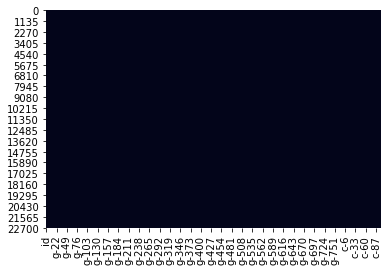

In [6]:
# Checando se há valores ausentes
sns.heatmap(df.isnull(), cbar=False)

Não encontramos nenhum valor NA na base de dados.

In [7]:
# Verificando as dimensões do objeto
df.shape

(23814, 877)

O dataset contém 23814 registros (linhas) e 877 variáveis (colunas).

In [8]:
# Contando valores únicos
info = df[['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'c-0']].nunique().sort_values()

# Determinando o tipo de dados para cada variável
info = pd.DataFrame(info.values, index = info.index, columns = ['NUniques'])

# Atribuindo as informações sobre o tipo de dados das variáveis em um DataFrame
info['dtypes'] = df.dtypes

# Exibe o dataframe
display(info)

,NUniques,dtypes
tratamento,2,object
dose,2,object
tempo,3,int64
droga,3289,object
g-0,14367,float64
c-0,14421,float64
id,23814,object


Aparentemente os dados foram carregados corretamente, com o tipo de dado correspondendo ao que cada variável representa.

### 4. Análise exploratória dos dados

Criando uma função para nos auxiliar no cálculo de algumas estatísticas fundamentais.

In [9]:
# Definindo uma função para gerar um dataframe com estatísticas de variáveis numéricas.
def varStats(col, data, target = ''):

    if target == '':

        stats = pd.DataFrame({
            'Min'   : data[col].min(),
            'Q1'    : data[col].quantile(.25),
            'Median': data[col].median(),
            'Mean'  : data[col].mean(),
            'Q3'    : data[col].quantile(.75),
            'Max'   : data[col].max(),
            'SD'    : data[col].std(),
            'SK'    : skew(data[col]),
            'KU'    : kurtosis(data[col])
        }, index = [col])

    else:

        stats = pd.concat([
            df[[col, target]].groupby(target).min(),
            df[[col, target]].groupby(target).quantile(.25),
            df[[col, target]].groupby(target).median(),
            df[[col, target]].groupby(target).mean(),
            df[[col, target]].groupby(target).quantile(.75),
            df[[col, target]].groupby(target).max(),
            df[[col, target]].groupby(target).std(),
            df[[col, target]].groupby(target).skew(),
            df[[col, target]].groupby(target).apply(lambda group: kurtosis(group)[0])

        ], axis = 1)

        stats.columns = ['Min', 'Q1', 'Median', 'Mean', 'Q3', 'Max', 'SD', 'SK', 'KU']

    return stats

O coeficiente de assimetria (Skewness) indica como os dados são distribuídos e para interpretar seu resultado podemos olhar a seguinte tabela:


Skewness  | Descrição
:------------- | :-------------
SK  ≈  0 | Os dados são simétricos. Tanto a cauda direita quanto a esquerda da função de densidade de probabilidade são iguais
SK  <  0  | A assimetria é negativa. A cauda do lado esquerdo da função de densidade de probabilidade é maior do que a cauda à direita.
SK  >  0  | A assimetria é positiva. A cauda do lado direito da função de densidade de probabilidade é maior do que a cauda do lado esquerdo.

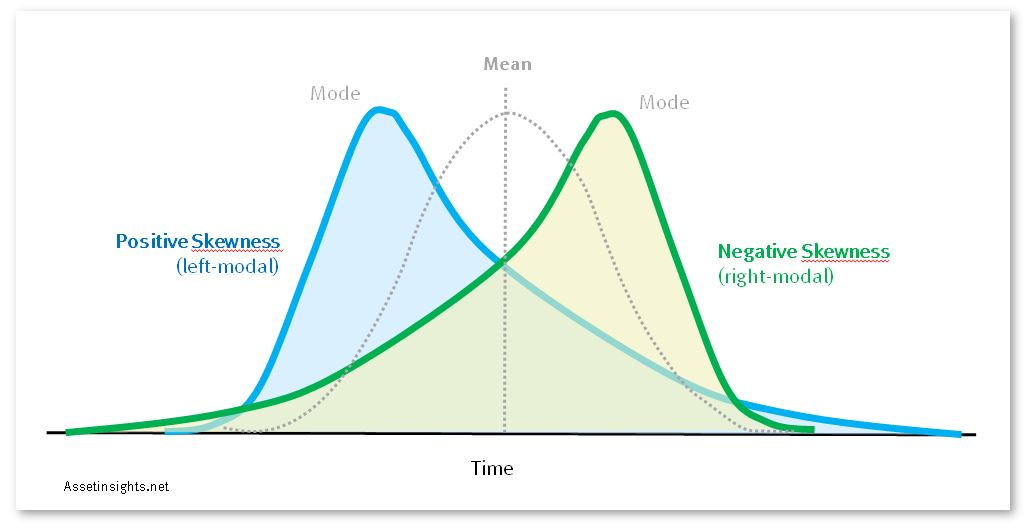

In [10]:
from IPython.display import Image
Image("img/skew.png")

O coeficiente de curtose (curtose) é uma medida que caracteriza o achatamento da curva da função de distribuição e para interpretar o seu resultado podemos observar a seguinte tabela:


Kurtosis  | Descrição
:---------| :-------------
KU ≈ 0    | A distribuição é normal e é chamada de curtose mesocúrtica
KU < 0    | A curva é mais plana do que o normal. Para um coeficiente de curtose negativo existe uma curtose platicúrtica.
KU > 0    | A curva é mais proeminente do que o normal. Para um coeficiente de curtose positivo, existe uma curtose leptocúrtica.

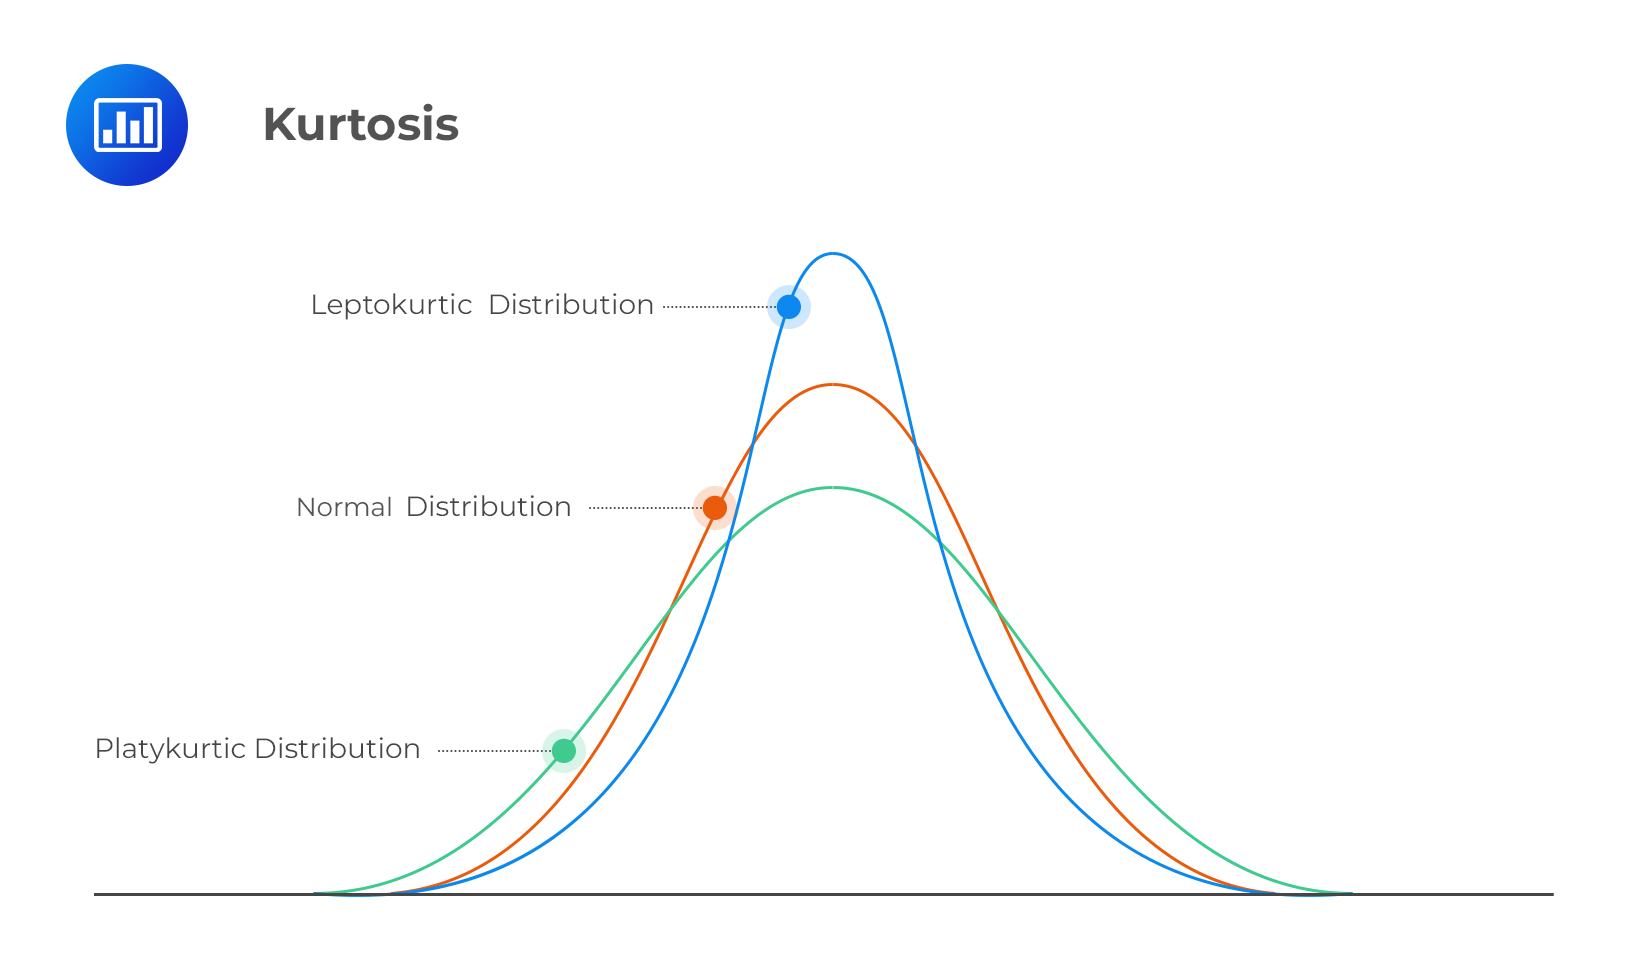

In [11]:
from IPython.display import Image
Image("img/kurtosis.png")

In [12]:
# Resumo das variáveis categóricas
df.describe(include=object)

,id,tratamento,dose,droga
count,23814,23814,23814,23814
unique,23814,2,2,3289
top,id_68cbd6762,com_droga,D1,cacb2b860
freq,1,21948,12147,1866


Com essa tabela vemos que temos 2 valores posssíveis para dose (D1/D2) e para tratamento (Tratado/Controle). é interessante observar que a droga **'cacb2b860'** é o valor mais frequente, com um total de 1866 registros. Devemos investigar isso mais detalhadamente.

In [13]:
# Resumo das variáveis numéricas
df.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


É praticamente impossivel analisar cada gene e viabilidade celular olhando somente essa tabela. Entretanto conseguimos tirar uma informação valiosa ao observar os valores mínimos e máximos das variáveis que representam a expressão gênica (g) e viabilidade celular (c). Os valorem oscilam entre -10.0 e 10.0, o que nos mostra que esses dados já estão normalizados.

No caso da análise da expressão gênica, o que os pesquisadores geralmente fazem é converter os resultados da amplificação gênica pelo RT-PCR (ou qualquer outro método de biologia molecular para amplificação de ácidos nucleicos) em um valor de Log na base 2, o que pode explicar o porquê dos dados estarem nessa escala. 

Começaremos nossa análise exploratória olhando para a variável **'droga'**, descobrindo quantas drogas distintas foram utilizadas nesses experimentos. Nesse conjunto de dados foram utilizadas mais de 3000 drogas, será que há alguma diferença na frequência que elas aparecem?

In [14]:
# Contando os valores da coluna 'droga' e retornando as 10 mais utilizadas
df['droga'].value_counts().head(10)

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: droga, dtype: int64

In [15]:
# Retornando os dados em porcentagem
dados['droga'].value_counts(normalize = True).map('{:.2%}'.format).head(10)

cacb2b860    7.84%
87d714366    3.02%
9f80f3f77    1.03%
8b87a7a83    0.85%
5628cb3ee    0.85%
d08af5d4b    0.82%
292ab2c28    0.81%
d50f18348    0.78%
d1b47f29d    0.75%
67c879e79    0.08%
Name: droga, dtype: object

Podemos observar que apenas 9 drogas, dentre as mais de 3000, aparecem com muito mais frequência do que a média.

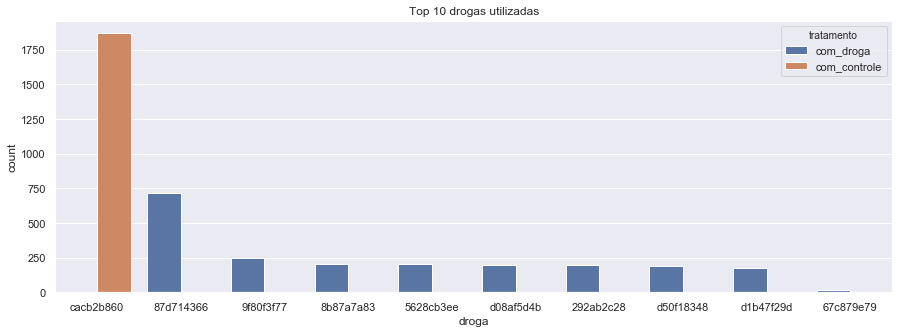

In [16]:
# Criando uma variável ordenada com as drogas mais utilizadas
cod_drogas = df['droga'].value_counts().index[0:10]

# Criando um grafico de barras
sns.set()
plt.figure(figsize=(15, 5))
ax = sns.countplot(x = 'droga', data=df.query('droga in @cod_drogas'), order=cod_drogas, hue='tratamento')
ax.set_title('Top 10 drogas utilizadas')

plt.show()

A droga **"cacb2b860"** na verdade é um código para demonstrar que a amostra não recebeu tratamento nenhum, por isso está com mais registros do que as outras.

In [17]:
# Verificando a proporção entre os dados na var 'tratamento'
df['tratamento'].value_counts(normalize = True).map('{:.2%}'.format)

com_droga       92.16%
com_controle     7.84%
Name: tratamento, dtype: object

Aparentemente os dados estão desbalanceados entre os grupos tratado e controle. Uma hipótese para explicar essa diferença é que não precisamos utilizar um controle para cada amostra, geralmente os pesquisadores comparam vários grupos tratado com um controle, desde que a única diferença entre os grupos seja a variável de interesse, que no caso é o tratamento com a droga específica.

In [18]:
# Verificando a proporção entre os dados na var 'dose'
df['dose'].value_counts(normalize = True).map('{:.2%}'.format)

D1    51.01%
D2    48.99%
Name: dose, dtype: object

In [19]:
# Verificando a proporção entre os dados na var 'tempo'
df['tempo'].value_counts(normalize = True).map('{:.2%}'.format)

48    34.64%
72    32.72%
24    32.64%
Name: tempo, dtype: object

Para as outras variáveis os dados estão bem distribuidos.

In [20]:
pd.crosstab([df['dose'], df['tempo']],  df['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Com o crosstab podemos ver melhor como os dados estão organizados. O experimento foi desenhado para utilizar duas doses em três janelas de tempo diferentes (24h, 48h e 72h), sempre comparando o grupo tratado com o grupo controle. Ao observar as alterações nos níveis de expressão gênica e na viabilidade celular, podemos inferir se alguma droga está modulando determinados genes e como isso está afetando a viabilidade das células.

### 4.1 Análise das distribuições

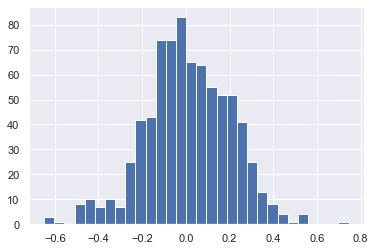

In [21]:
# Criando um histograma para verificar a distribuição das médias das expressões gênicas de g-0 até g-771
df.loc[:,'g-0':'g-771'].describe().T['mean'].hist(bins=30)

In [22]:
# Criando uma variável para receber os valores das médias das expressões gênicas de g-0 até g-771
g_mean_values = df.loc[:,'g-0':'g-771'].describe().T['mean']

# Transformando em uma série do pandas
pd.Series(g_mean_values)

# Ordenando a série em ordem decrescente
g_mean_values.sort_values(ascending=False)

g-707    0.744700
g-100    0.553186
g-744    0.548903
g-392    0.537320
g-38     0.534425
           ...   
g-672   -0.502762
g-50    -0.588018
g-37    -0.606710
g-508   -0.641689
g-370   -0.648438
Name: mean, Length: 772, dtype: float64

Podemos perceber que o gene **'g-707'** é o que apresenta a maior média de expressão, seguidos dos genes **'g-100'**, **'g-744'** e **'g-392'**. Enquanto os genes **'g-370'**, **'g-508'** e **'g-37'** apresentaram a menor média de expressão.

In [23]:
# Transformando a série em um df do pandas
g_mean_values_df = g_mean_values.to_frame()

# Definindo a coluna para calcular as estatísticas
col = 'mean'

# Aplicando a função varStats no conjunto de dados
varStats(col, data = g_mean_values_df)

,Min,Q1,Median,Mean,Q3,Max,SD,SK,KU
mean,-0.648438,-0.117415,0.001557,0.00901,0.148669,0.7447,0.195745,-0.13982,0.370724


A distribuição dos dados se assemelha muito a uma curva normal. Podemos observar uma assimetria levemente negativa, indicando que cauda do lado esquerdo da distribuição é maior do que a cauda à direita. A kurtosis levemente positiva indica que a curva é mais proeminente do que o normal, os dados estão levemente mais concentrados em torno da média da distribuição com um desvio padrão baixo.

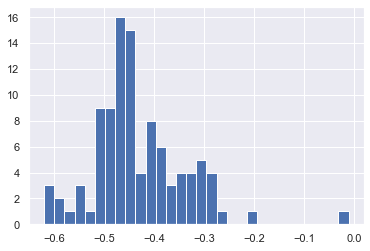

In [24]:
df.loc[:,'c-0':'c-99'].describe().T['mean'].hist(bins=30)

In [25]:
# Criando uma variável para receber os valores das médias das expressões gênicas de g-0 até g-771
c_mean_values = df.loc[:,'c-0':'c-99'].describe().T['mean']

In [26]:
# Transformando em uma série do pandas
pd.Series(c_mean_values)

# Ordenando a série em ordem decrescente
c_mean_values.sort_values(ascending=False)

c-74   -0.010404
c-37   -0.209301
c-7    -0.266293
c-76   -0.276963
c-69   -0.277029
          ...   
c-26   -0.597730
c-38   -0.598003
c-63   -0.613591
c-18   -0.619461
c-65   -0.619682
Name: mean, Length: 100, dtype: float64

Observamos que as variáveis que representam a viabilidade celular que apresentaram a maior média foram as **'c-74**, **'c-37'**, **'c-7'**, **'c-76'** e **'c-69'**. Enquanto as menores médias foram as variáveis **'c-65'**, **'c-18'**, **'c-63'**, **'c-38'** e **'c-26'** respectivamente. É interessante observar que todas as médias foram negativas, o que pode indicar baixa viabilidade celular para todas as variáveis do dataset.

In [27]:
# Transformando a série em um df do pandas
c_mean_values_df = c_mean_values.to_frame()

# Definindo a coluna para calcular as estatísticas
col = 'mean'

# Aplicando a função varStats no conjunto de dados
varStats(col, data = c_mean_values_df)

,Min,Q1,Median,Mean,Q3,Max,SD,SK,KU
mean,-0.619682,-0.483686,-0.453229,-0.432231,-0.381911,-0.010404,0.093786,1.012497,3.039566


A distribuição dos dados se assemelha muito a uma curva normal. Podemos observar uma assimetria bem positiva, indicando que cauda do lado direito da distribuição é maior do que a cauda à direita, os dados estão concentrados no lado esquerdo da distribuição. A kurtosis fortemente positiva indica que a curva é bem mais proeminente do que o normal, os dados estão muito mais concentrados em torno da média da distribuição (-0,432231) com um desvio padrão baixo (0,093).

Para esse etapa, iremos selecionar apenas 10 genes e 10 dados de viabilidade celular por motivos de tempo hábil para executar o projeto. Os critérios serão baseados nas top 5 maiores e menores médias de expressão para as variáveis de expressão gênica e o mesmo critério também será aplicado para as variáveis de viabilidade celular.

In [28]:
# Criando duas lista com as variáveis selecionadas

# Para as variáveis de viabilidade celular
c_list = ['c-74',
          'c-37',
           'c-7',
          'c-76',
          'c-69',
          'c-26',
          'c-38',
          'c-63',
          'c-18',
          'c-65']

# Para as variáveis de expressão gênica
g_list = ['g-707',
          'g-100',
          'g-744',
          'g-392',
           'g-38',
          'g-672',
           'g-50',
           'g-37',
          'g-508',
          'g-370']

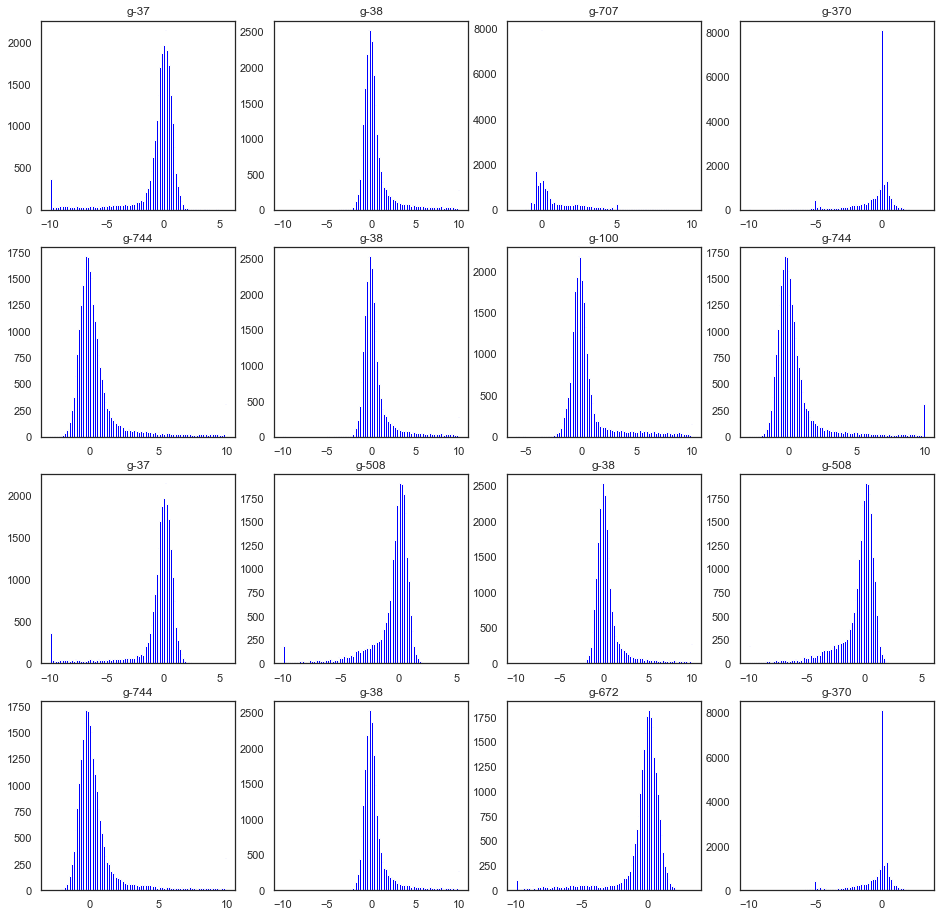

In [29]:
# Criando plot para as distribuições dos dados para cada variável
plt.figure(figsize=(16,16))
sns.set_style('white')
genes = np.random.choice(len(g_list),16)
                               
for i,col in enumerate(genes):
    plt.subplot(4,4,i+1)
    plt.hist(df.loc[:,g_list[col]],bins=100,color='blue')
    plt.title(g_list[col])

Podemos verificar com esses histogramas como estão distribuidos os dados de expressão gênica para cada gene dentro dos top 10 selecionados.

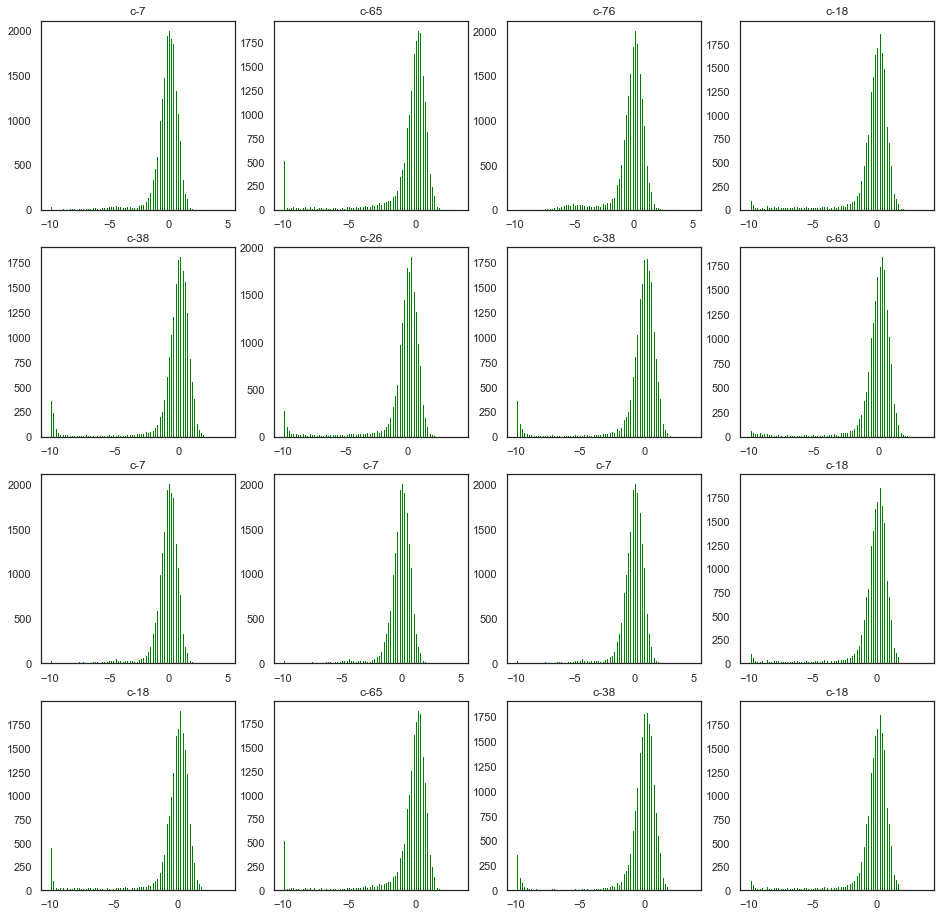

In [30]:
# Criando plot para as distribuições dos dados para cada variável
plt.figure(figsize=(16,16))
sns.set_style('white')
viabilidade = np.random.choice(len(c_list),16)
                               
for i,col in enumerate(viabilidade):
    plt.subplot(4,4,i+1)
    plt.hist(df.loc[:,c_list[col]],bins=100,color='green')
    plt.title(c_list[col])

Podemos verificar com esses histogramas como estão distribuidos os dados de viabilidade celular para cada variável dentro das top 10 selecionados.

### 4.2 Análise de correlação

Analisaremos a correlação entre as features selecionadas anteriormente.

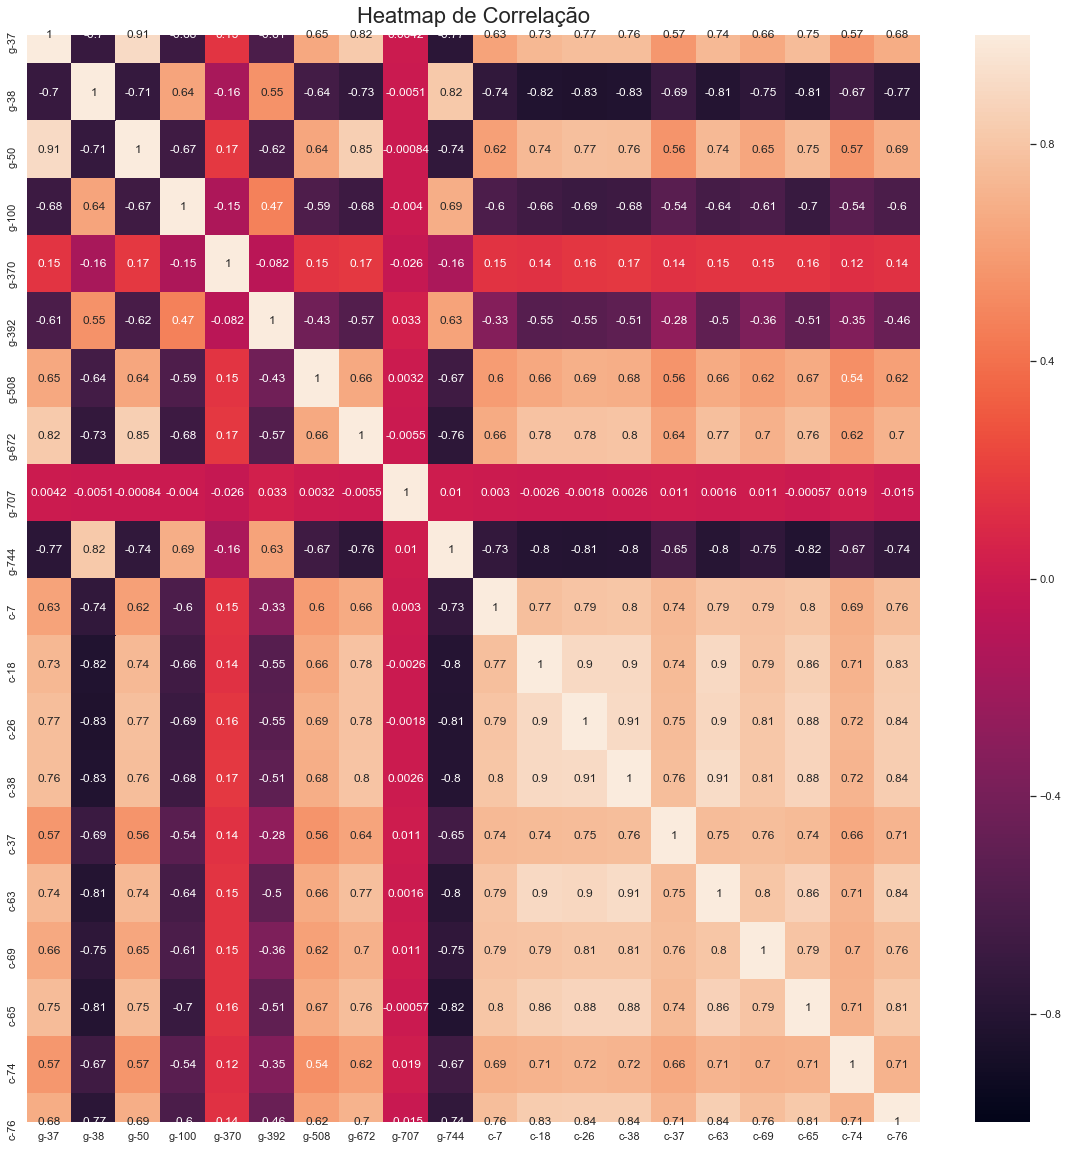

In [31]:
# Criando um dataframe somente com as variáveis de interesse
var_df = df.iloc[:,[42,43,55,105, 375, 397, 513, 677, 712, 749, 784, 795, 803, 815, 814, 840, 846, 842, 851, 853]]

# Criando um heatmap para a análise correlação
plt.figure(figsize=(20, 20))

heatmap = sns.heatmap(var_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de Correlação', fontdict={'fontsize':22}, pad=12);


A partir desse mapa de correlação podemos inferir que alguns genes se correlacionam tanto positivamente como negativamente com a viabilidade celular. Em outras palavras, existem situações em que a expressão gênica aumenta e a viabilidade celular também (correlação positiva) e casos em que a expressão gênica diminui/aumenta e a viabilidade celular aumenta/diminui (correlação negativa). Vamos pegar, apenas como exemplo, o gene **'g-38'** que está correlacionado negativamente a praticamente todas as variáveis de viabilidade celular e o gene **'g-672'** que está correlacionado positivamente. Para fins de demonstração, vamos selecionar a var **'c-26'**, será que a expressão aumenta quando a viabilidade diminui ou o contrário?

**O ideal seria analisar todos os genes do dataset, com todas as combinações possíveis, vamos escolher esses dois apenas para ilustrar o conceito.**

#### 4.2.1 Agrupando os dados de correlação por clusters

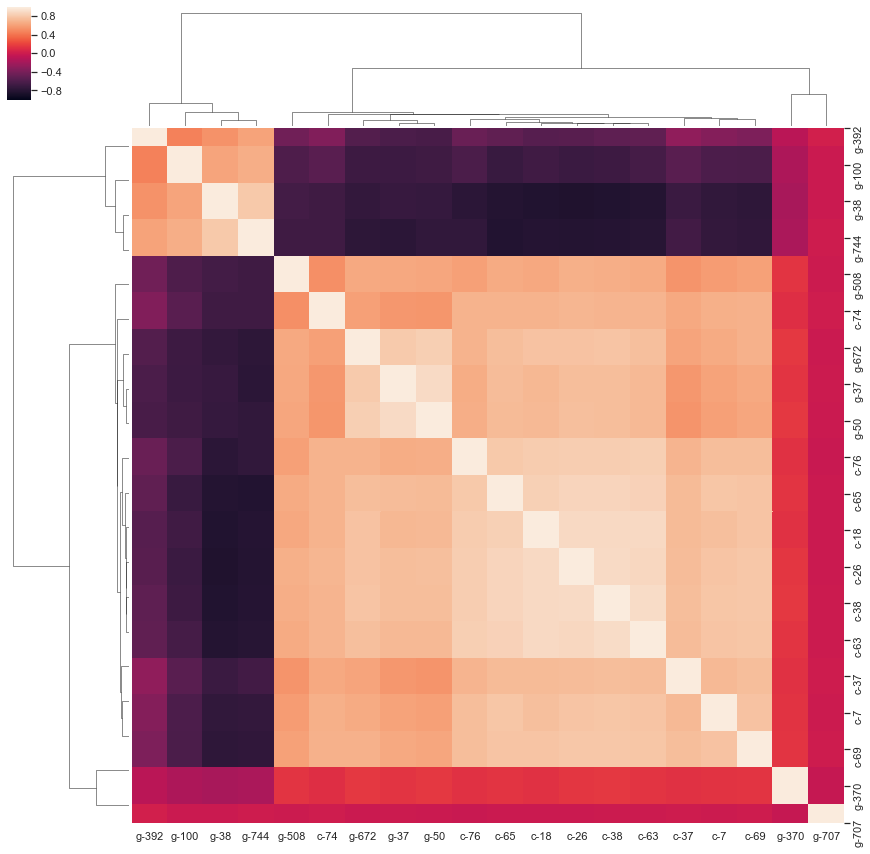

In [32]:
# Criando um dataframe somente com as variáveis de interesse
var_df = df.iloc[:,[42,43,55,105, 375, 397, 513, 677, 712, 749, 784, 795, 803, 815, 814, 840, 846, 842, 851, 853]]

# Criando um clustermap para a análise correlação em grupos
clustermap = sns.clustermap(var_df.corr(), vmin=-1, vmax=1, annot=False, figsize=(15, 15), method='centroid', metric='euclidean')


Podemos ver dois grandes clusters dentro do mapa de correlação, os genes **'g-392'**, **'g-100'**, **'g-38'** e o **'g-744'** se correlacionam positivamente entre si e negativamente com as outras variáveis. Os genes **'g-370'** e **'g-707'** não se correlacionam com nenhuma outra variável, um possível explicação para isso é que esses genes possam ser controle. Esse tipo de visualização do mapa de correlação pode ser muito útil para identificar grupos que se correlacionam entre si.

In [33]:
# Definindo a variável a ser calculada
col = 'c-26'

# Aplicando a função
varStats(col, target = 'tempo', data = df)

,Min,Q1,Median,Mean,Q3,Max,SD,SK,KU
tempo,,,,,,,,,
24,-10.0,-0.548100,-0.00945,-0.392718,0.470350,4.144,1.854735,-3.353592,12.387887
48,-10.0,-0.578850,0.01355,-0.603582,0.472275,3.096,2.299757,-2.936455,8.348284
72,-10.0,-0.592525,0.01540,-0.796020,0.463325,3.368,2.573439,-2.540131,5.635984


Somente olhando essas estatísticas poderíamos inferir que quanto maior o tempo e exposição a droga, **menor** a viabilidade celular. Contudo, precisaríamos rodar testes estatísticos específicos (como um ANOVA) para verificar se essa diferença é significante.

In [34]:
# Definindo a variável a ser calculada
col = 'g-38'

# Aplicando a função
varStats(col, target = 'tempo', data = df)

,Min,Q1,Median,Mean,Q3,Max,SD,SK,KU
tempo,,,,,,,,,
24,-4.938,-0.446675,0.0242,0.375485,0.643300,10.0,1.502058,2.498307,8.496335
48,-3.651,-0.467100,0.0139,0.573537,0.690875,10.0,2.056040,2.866577,8.890120
72,-10.000,-0.501825,-0.0216,0.651545,0.601800,10.0,2.345156,2.574667,6.542623


Somente olhando essas estatísticas poderíamos inferir que quanto maior o tempo e exposição a droga, **maior** a expressão gênica. Contudo, precisaríamos rodar testes estatísticos específicos (como um ANOVA) para verificar se essa diferença é significante.

<Figure size 720x360 with 0 Axes>

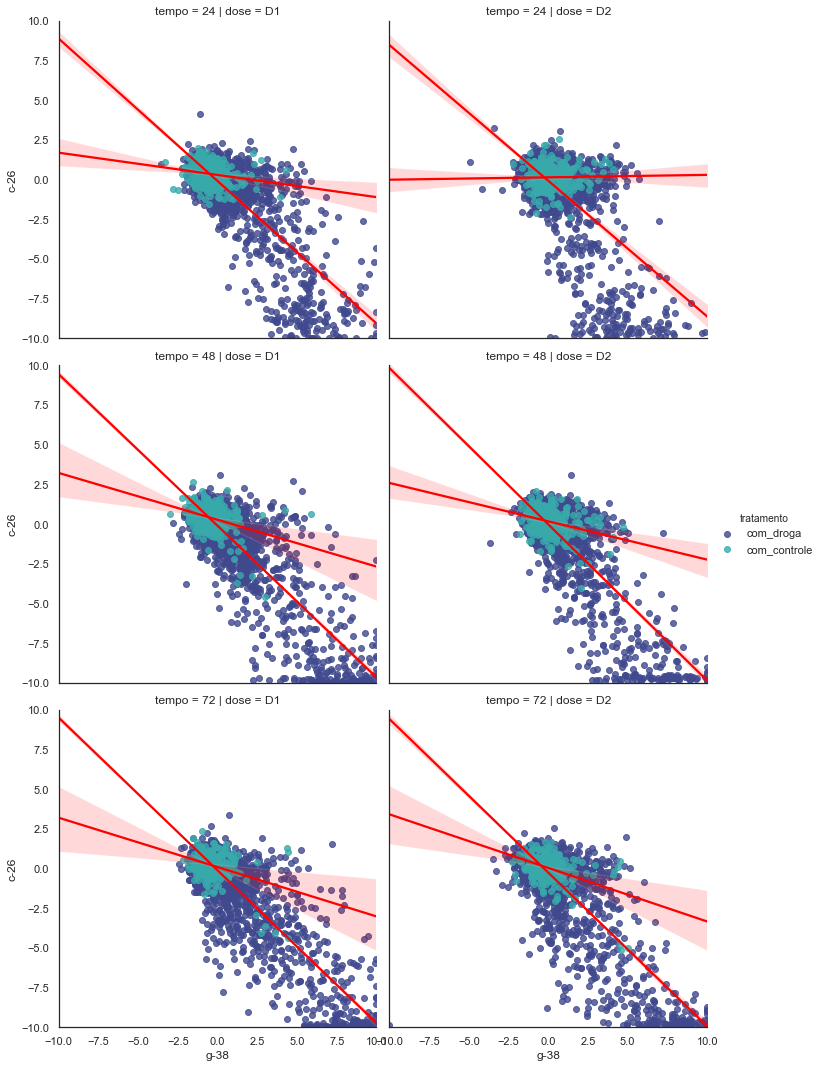

In [35]:
# Configurando o grid e o scatterplot
plt.figure(figsize=(10, 5))
a_plot = sns.lmplot(data=df, x='g-38', y='c-26', line_kws={'color': 'red'}, col='dose', row='tempo', hue="tratamento", palette="mako")

# Ajustando a escala
a_plot.set(xlim=(-10, 10))
a_plot.set(ylim=(-10, 10))

Podemos afirmar que quando a expressão gênica de g-38 aumenta a viabilidade tende a diminuir. Pensando nos efeitos biológios, a droga está afetando a viabilidade celular modulando a expressão gênica desse gene específico.

In [36]:
# # Definindo a variável a ser calculada
col = 'g-672'

# Aplicando a função
varStats(col, target = 'tempo', data = df)

,Min,Q1,Median,Mean,Q3,Max,SD,SK,KU
tempo,,,,,,,,,
24,-10.0,-0.547950,0.01185,-0.443009,0.48820,2.784,1.916946,-2.790088,8.427621
48,-10.0,-0.568000,0.00890,-0.500337,0.48065,2.802,1.958955,-2.674339,7.585641
72,-10.0,-0.569125,0.02665,-0.564930,0.46125,3.433,2.054200,-2.636361,7.031201


Somente olhando essas estatísticas poderíamos inferir que quanto maior o tempo e exposição a droga, **menor** a expressão gênica. Contudo, precisaríamos rodar testes estatísticos específicos (como um ANOVA) para verificar se essa diferença é significante.

<Figure size 720x360 with 0 Axes>

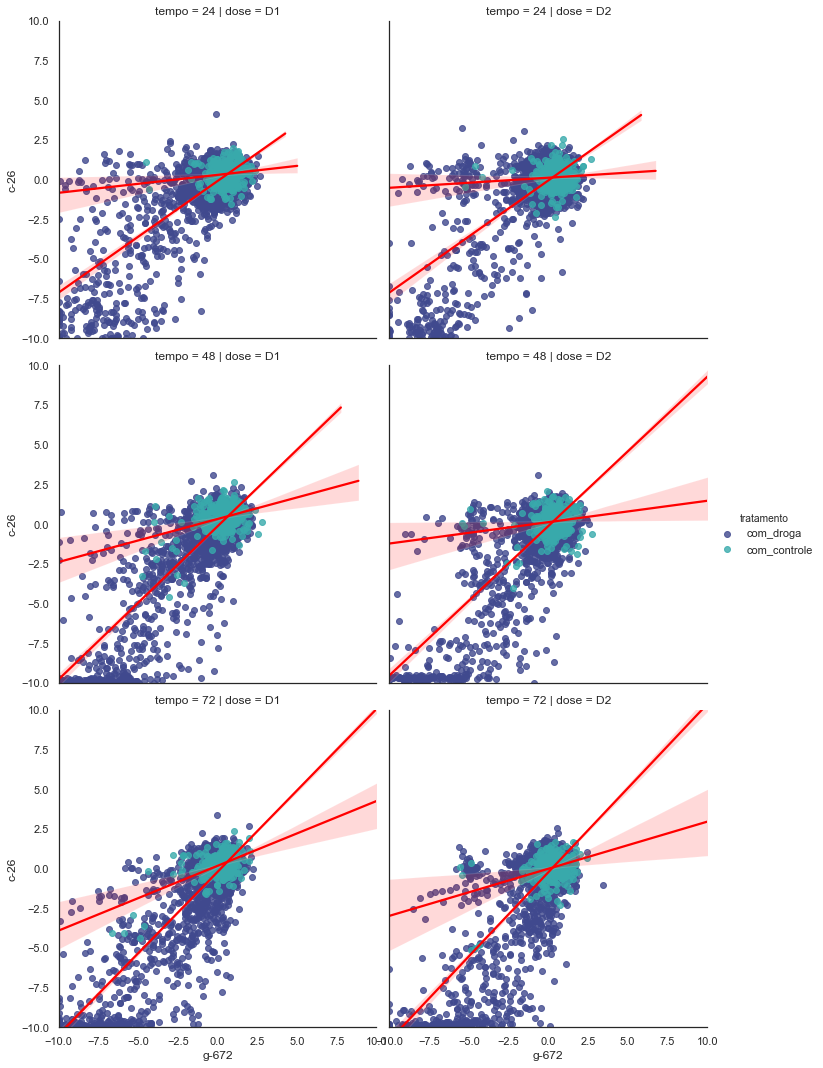

In [37]:
# Configurando o grid e o scatterplot
plt.figure(figsize=(10, 5))
b_plot = sns.lmplot(data=df, x='g-672', y='c-26', line_kws={'color': 'red'}, col='dose', row='tempo', hue="tratamento", palette="mako")

# Ajustando a escala
b_plot.set(xlim=(-10, 10))
b_plot.set(ylim=(-10, 10))

Podemos afirmar que quando a expressão gênica de g-672 aumenta a viabilidade tende a aumentar. Pensando nos efeitos biológios, a droga está afetando a viabilidade celular modulando a expressão gênica desse gene específico.

### 4.3 Analisando a distribuição entre os grupos com boxplots

Text(0.5, 1.0, 'Boxplot controle (cacb2b860)')

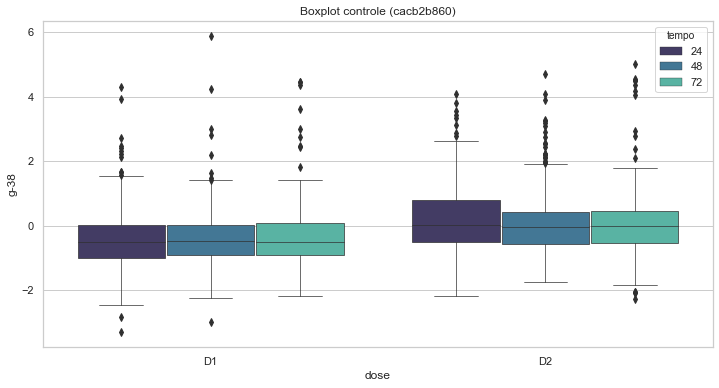

In [38]:
# boxplot controle
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.boxplot(data = df.query('droga == "cacb2b860"'), y= 'g-38', x='dose', hue='tempo', linewidth=0.7, palette='mako')
plt.title('Boxplot controle (cacb2b860)')

Perceba como não há diferenças significativas no grupo controle. Precisamos sempre utilizar esse grupo ao fazer comparações entre os grupos.

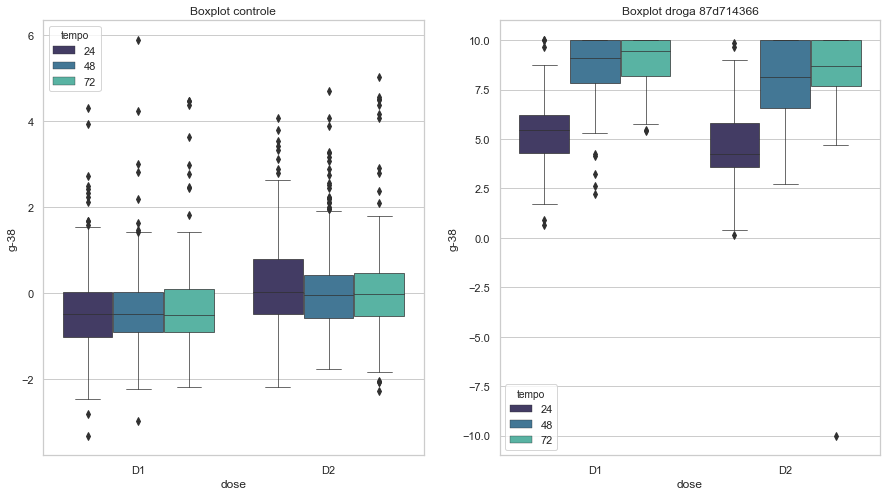

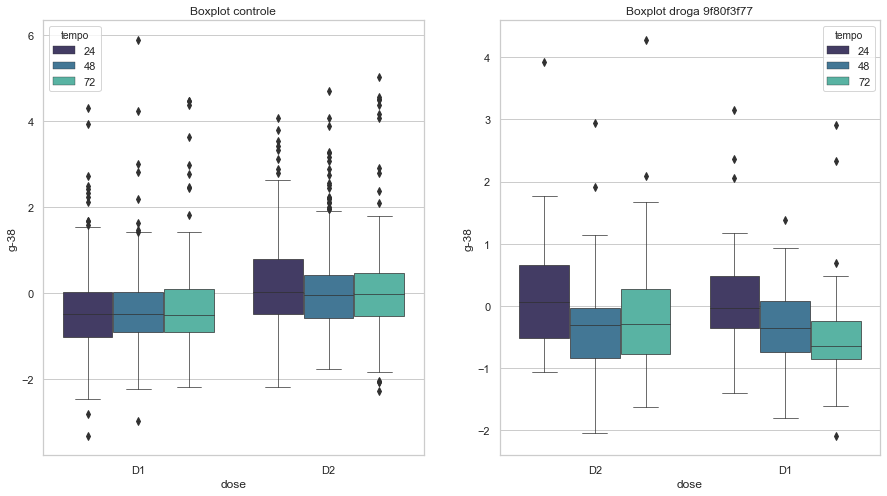

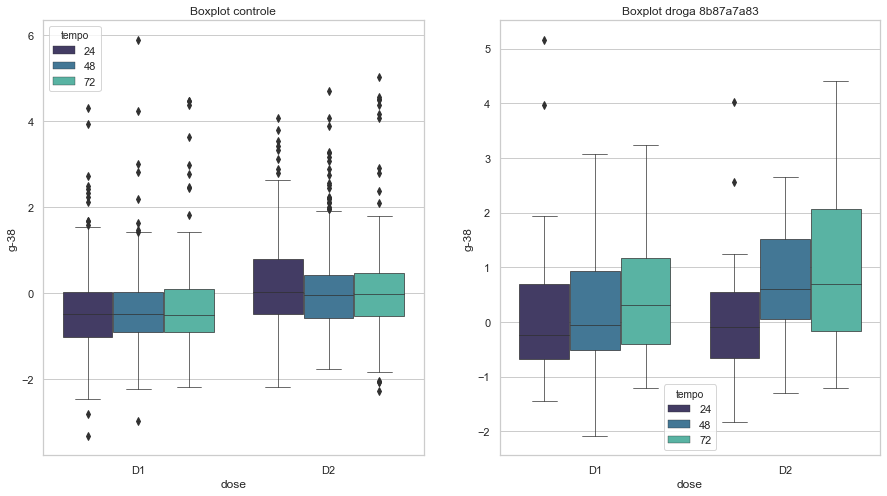

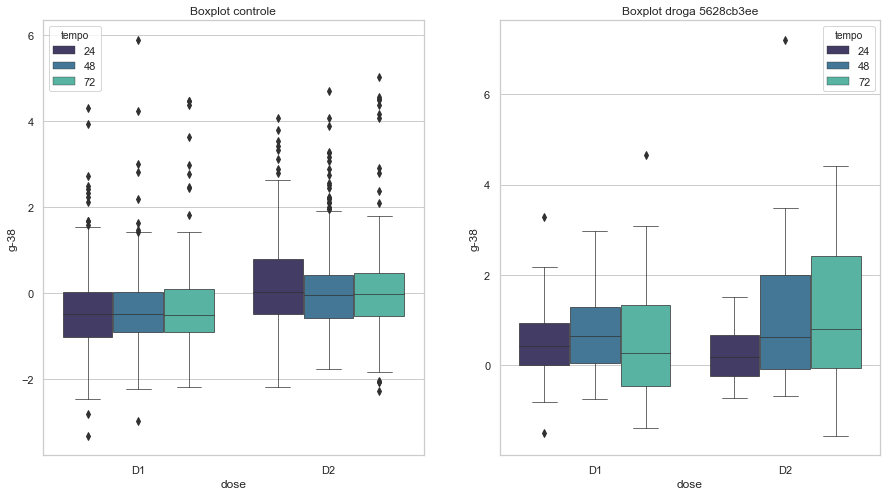

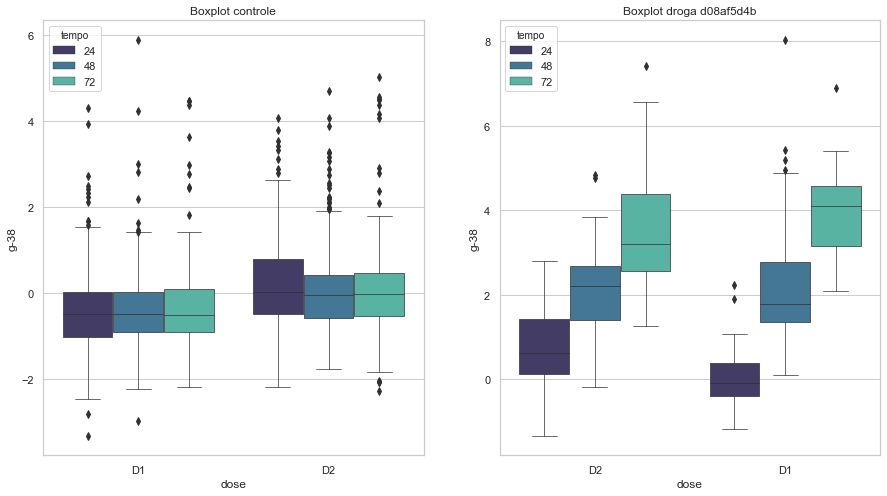

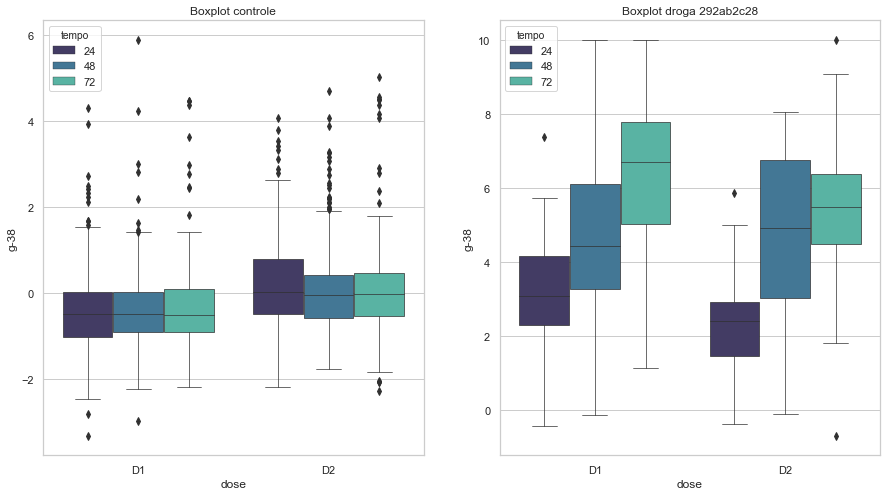

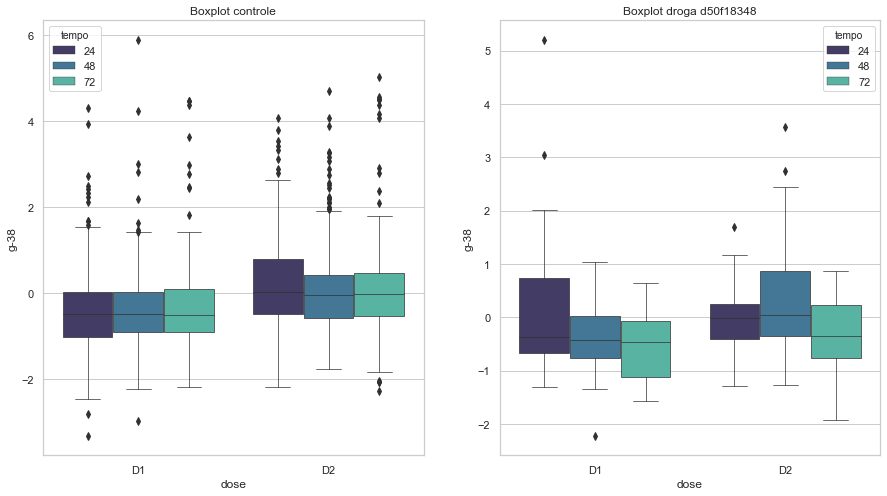

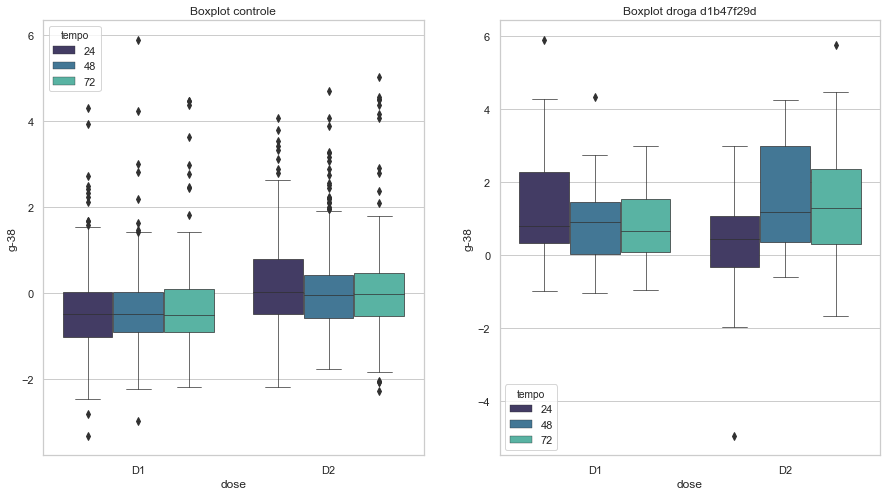

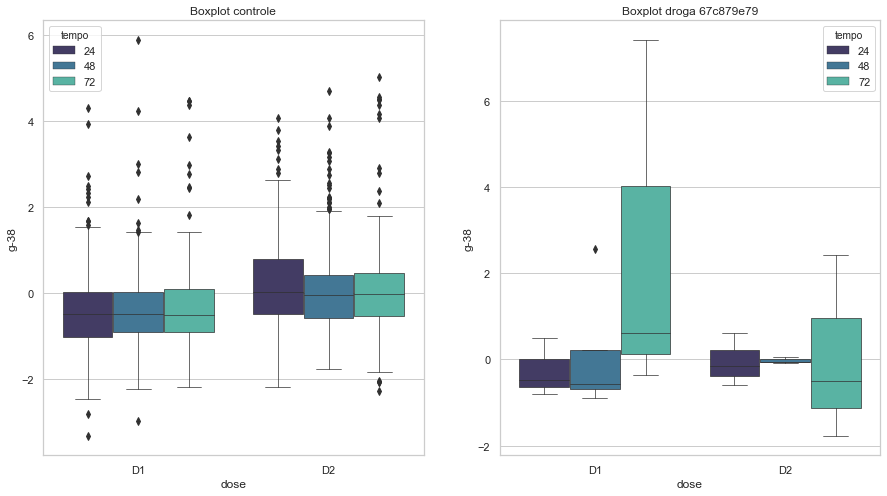

In [39]:
# Criando boxplots para cada droga dentro das top 10 mais utilizadas par avaliar a expressão do gene g-38 entre as doses 
# e os diferentes intervalos de tempo.

for droga in cod_drogas[1:]: # Para retirar o código do controle 'cacb2b860'
    fig, axs = plt.subplots(1,2,figsize=(15,8))
    sns.set_style("whitegrid")
    sns.boxplot(data = df.query('droga == "cacb2b860"'), y= 'g-38', x='dose', hue='tempo', linewidth=0.7, palette='mako', ax=axs[0])
    axs[0].set_title('Boxplot controle')
    sns.boxplot(data = df.query('droga == @droga'), y= 'g-38', x='dose', hue='tempo', linewidth=0.7, palette='mako', ax=axs[1])
    axs[1].set_title('Boxplot droga ' + droga )
    plt.show()
    

Ao comparar os grupos podemos inferir que cada uma desses drogas está modulando a expressão de g-38. Ainda assim, seriam necessários alguns testes estatísticos para comprovar essa hipótese.

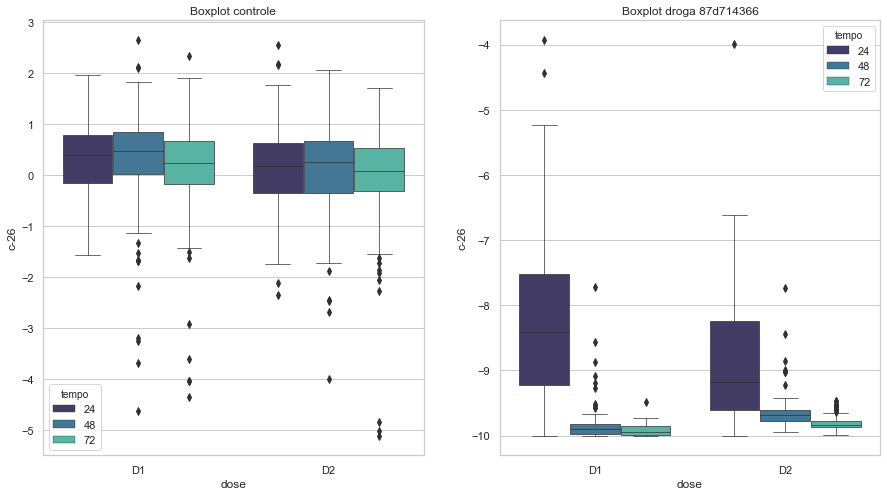

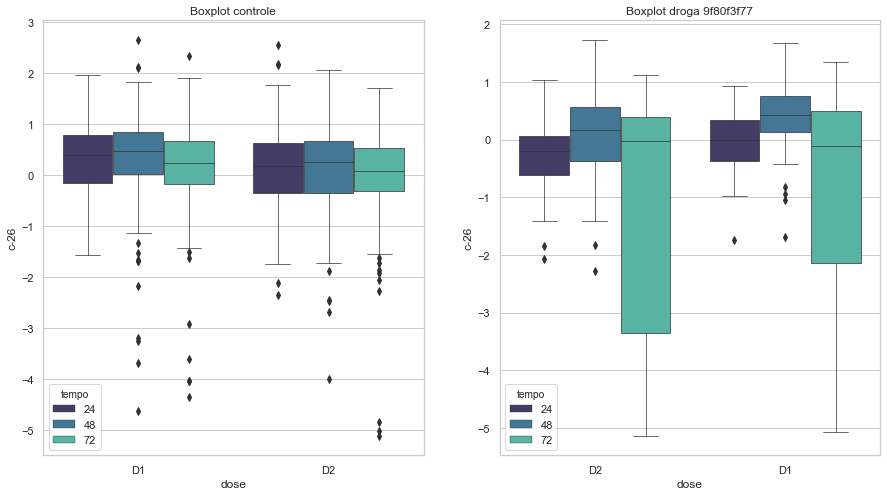

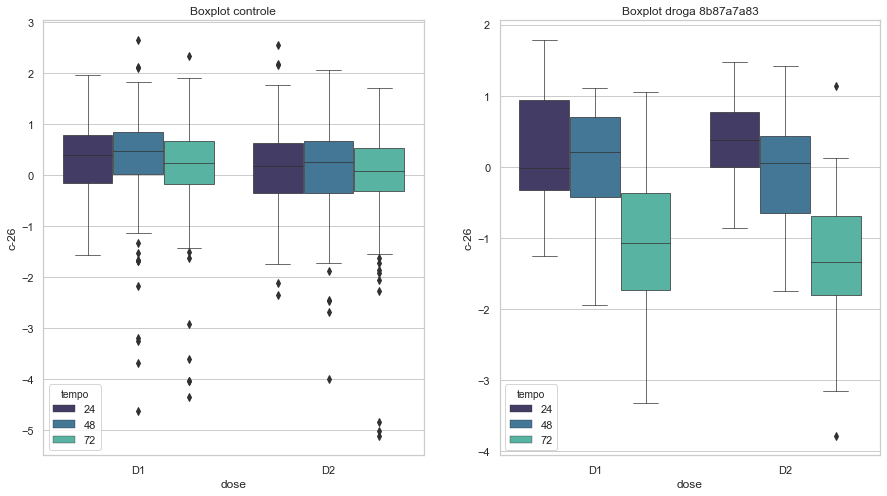

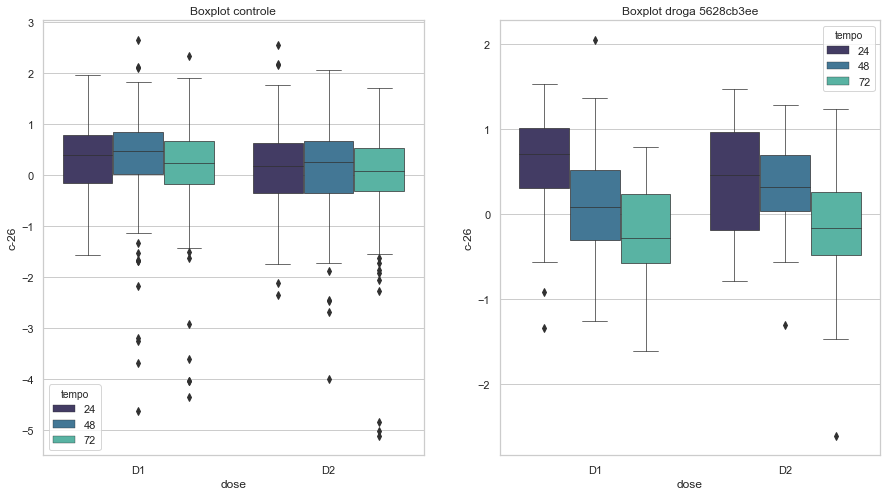

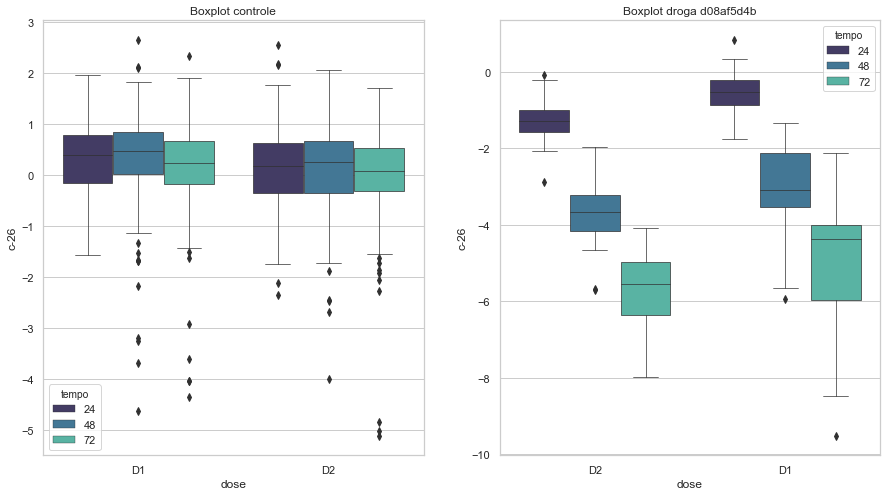

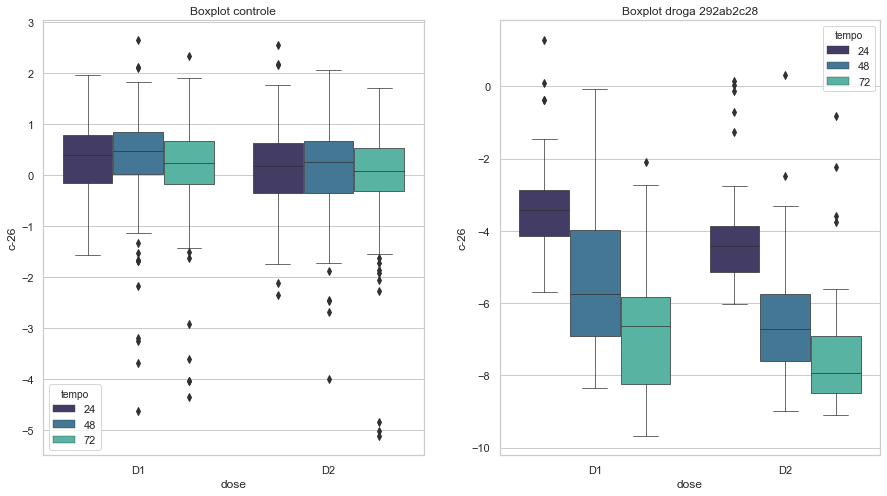

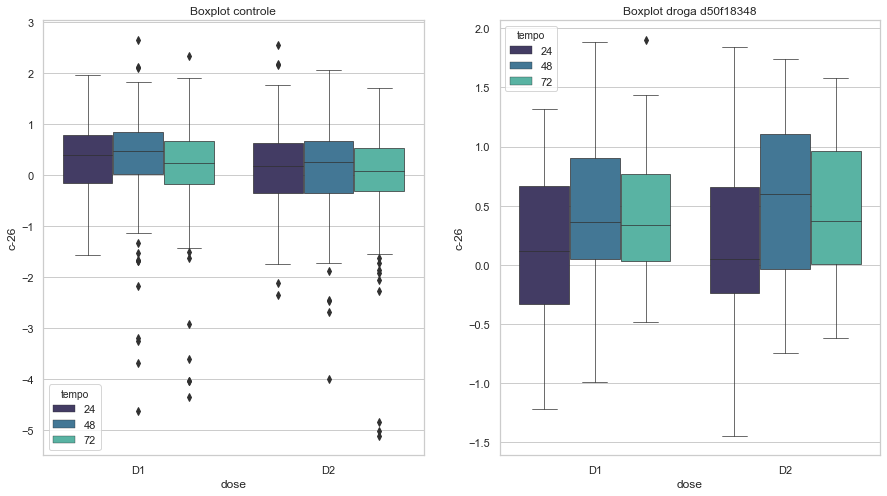

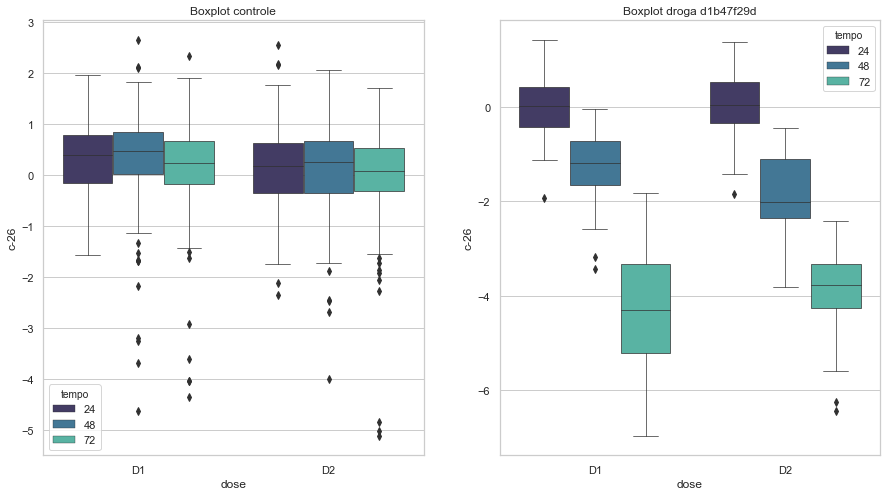

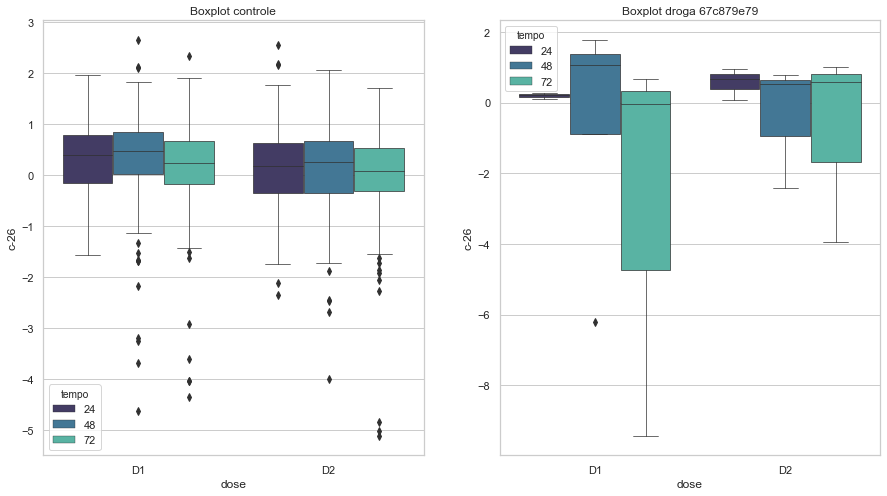

In [40]:
# Criando boxplots para cada droga dentro das top 10 mais utilizadas par avaliar a viabilidade celular na var 'c-26' entre as 
# doses e os diferentes intervalos de tempo.

for droga in cod_drogas[1:]: # Para retirar o código do controle 'cacb2b860'
    fig, axs = plt.subplots(1,2,figsize=(15,8))
    sns.set_style("whitegrid")
    sns.boxplot(data = df.query('droga == "cacb2b860"'), y= 'c-26', x='dose', hue='tempo', linewidth=0.7, palette='mako', ax=axs[0])
    axs[0].set_title('Boxplot controle')
    sns.boxplot(data = df.query('droga == @droga'), y= 'c-26', x='dose', hue='tempo', linewidth=0.7, palette='mako', ax=axs[1])
    axs[1].set_title('Boxplot droga ' + droga )
    plt.show()
    

Com essa série de boxplots, podemos perceber como diferentes drogas alteram o nível de expressão gênica, sempre comparadas com o grupo controle. Os intervalos de tempo também são importantes para modular a expressão, no caso do gene **'g-38'**  e da viabilidade celular **'c-26'** que foram  analisados, além disso, podemos comparar também a variável dose e verificar se existe alguma diferença.

Está análise é só um exemplo do que pode ser feito, o ideal seria analisar todos os genes e realizar testes estatísticos para verificar se as diferenças são significativas e depois descobrir que droga produz que tipo de efeito nos genes: superexpressão ou subexpressão gênica e como altera a viabilidade celular.

### 5. Carregando o segundo dataset, com os dados dos mecanismos de ação das drogas.



Conceitos importantes:

| Mecanismo de ação | Descrição                                                                                        |
|------------------:|:--------------------------------------------------------------------------------------------------|
|          Agonista | Droga capaz de se ligar a um receptor celular e ativá-lo para provocar uma resposta biológica.   |
|       Antagonista | Droga capaz de se ligar a um receptor celular e bloqueá-lo para provocar uma resposta biológica. |


In [41]:
resultados_df = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
resultados_df.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Contando valores únicos
info = resultados_df.drop('id', axis=1).sum().sort_values(ascending=False)

# Determinando o tipo de dados para cada variável
info = pd.DataFrame(info.values, index = info.index, columns = ['Count'])

# Atribuindo as informações sobre o tipo de dados das variáveis em um DataFrame
info['dtypes'] = resultados_df.dtypes

# Exibe o dataframe
display(info)

,Count,dtypes
nfkb_inhibitor,832,int64
proteasome_inhibitor,726,int64
cyclooxygenase_inhibitor,435,int64
dopamine_receptor_antagonist,424,int64
serotonin_receptor_antagonist,404,int64
...,...,...
protein_phosphatase_inhibitor,6,int64
autotaxin_inhibitor,6,int64
diuretic,6,int64
erbb2_inhibitor,1,int64


Mecanismos de ação que possuem maior quantidade de resultados positivos.

Neste momento, vamos mesclar os dois dataframes para criarmos algumas visualizações interessantes, mas antes disso vamos criar uma nova coluna chamada 'n_moa', que representa o número de mecanismos de ação ativos.

In [43]:
# Criando a var n_moa somando todos os valores em cada linha do df
resultados_df['n_moa'] = resultados_df.drop('id', axis=1).sum(axis=1)

In [44]:
# Verificando se a coluna apresenta resultados diferentes de 0. Caso algum mecanismo de ação tenha sido ativado o resultado 
# sera > 0
resultados_df['n_moa'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: n_moa, Length: 23814, dtype: bool

In [45]:
# Add a coluna 'ativo_moa' no dataframe
resultados_df['ativo_moa'] = (resultados_df['n_moa'] != 0)
resultados_df.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [46]:
# Unindo os dois dataframes pelo ID
df_merged = pd.merge(df, resultados_df[['id','n_moa', 'ativo_moa']], on='id')
df_merged.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Agora temos em um mesmo dataframe todas as variáveis de expressão gênica, viabilidade celular, dose, tempo, droga, além dos dados dos mecanismos de ação envolvidos, se algum foi ativado e total ativo.

In [47]:
# Verificando se no grupo controle existe algum mecanismo de ação ativado
df_merged.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

Como o total de registros no grupo controle é de 1866, nenhum mecanismo de ação foi ativado no grupo controle, o que é ideal.

### 6. Como diferentes drogas modulam a expressão de diferentes genes e a viabilidade celular?

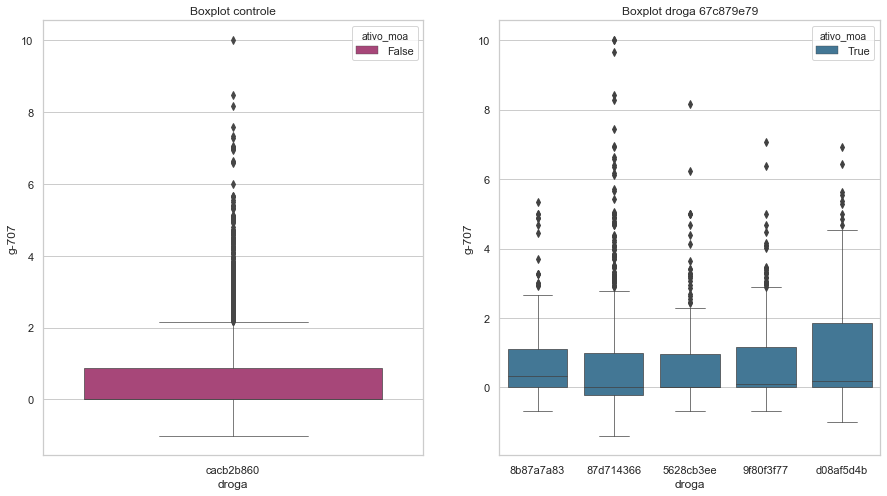

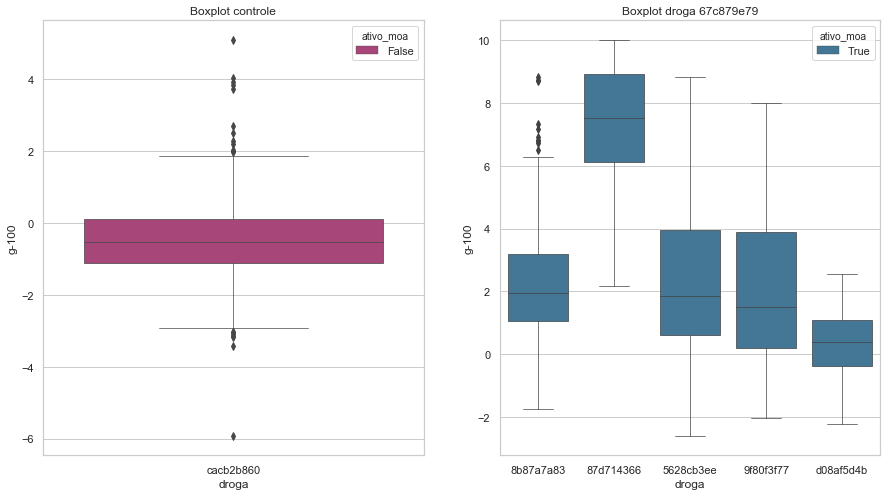

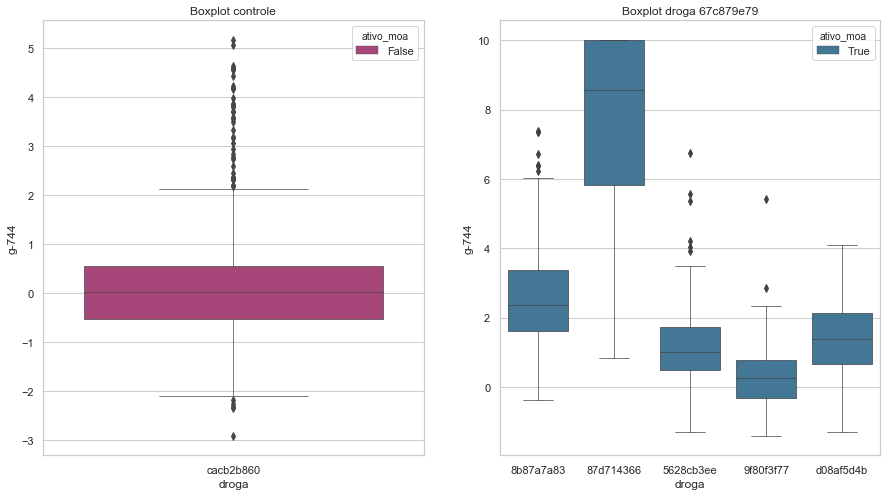

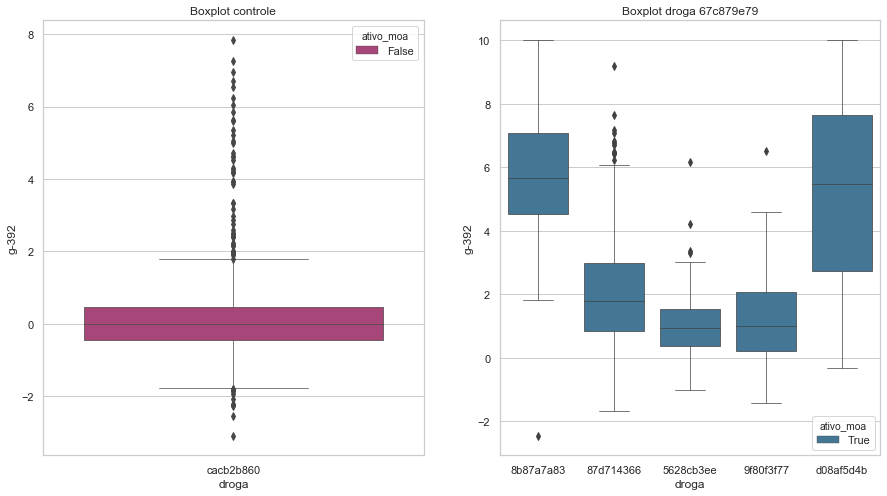

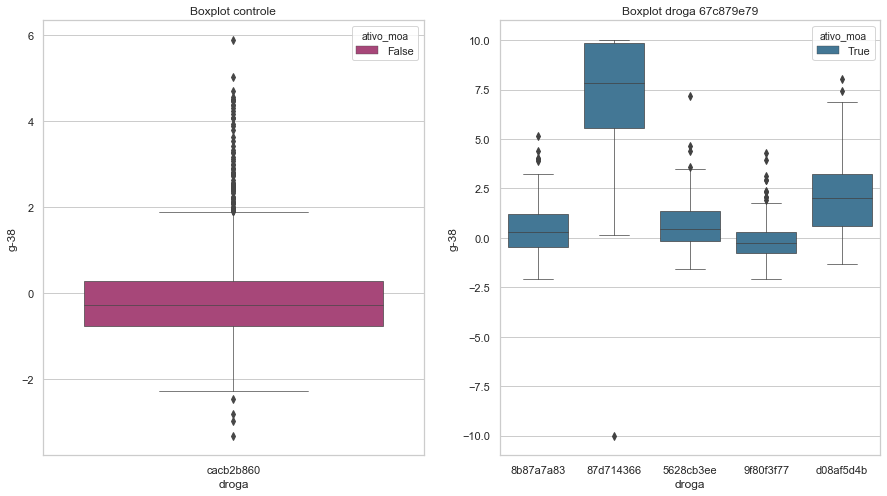

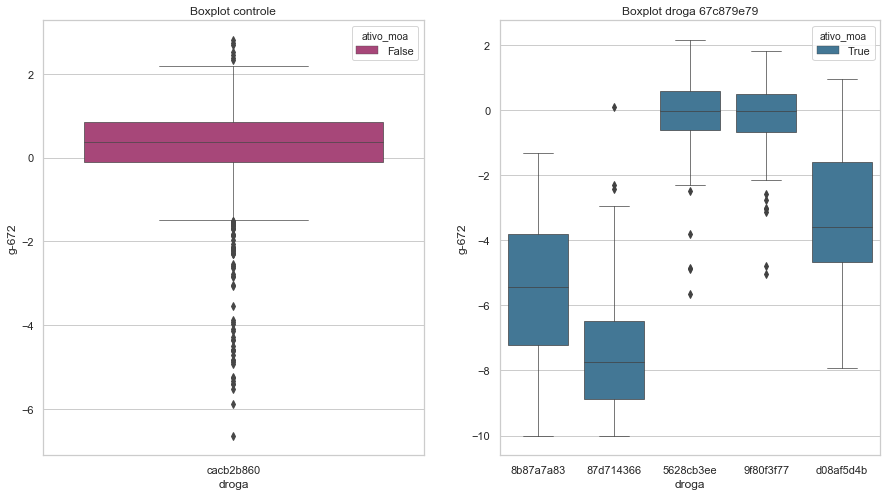

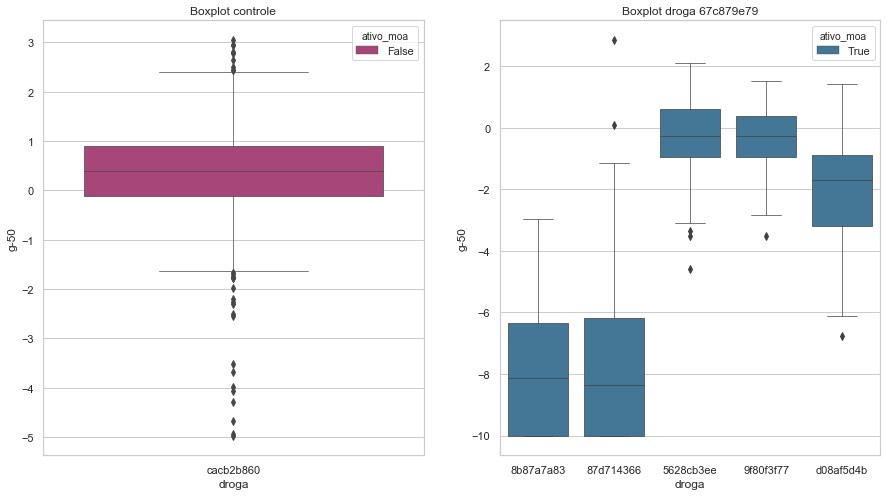

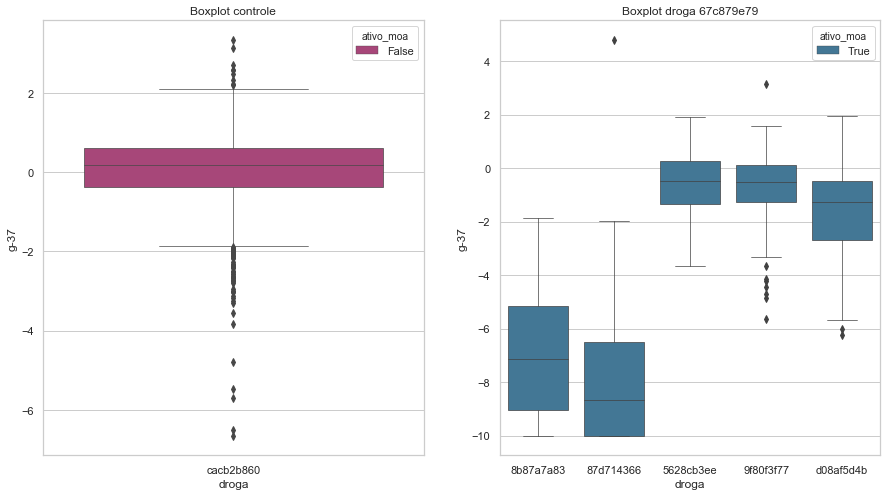

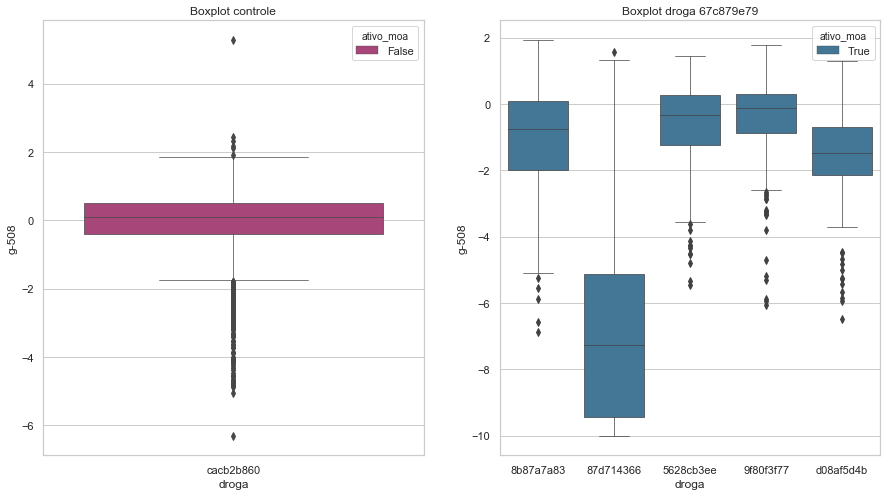

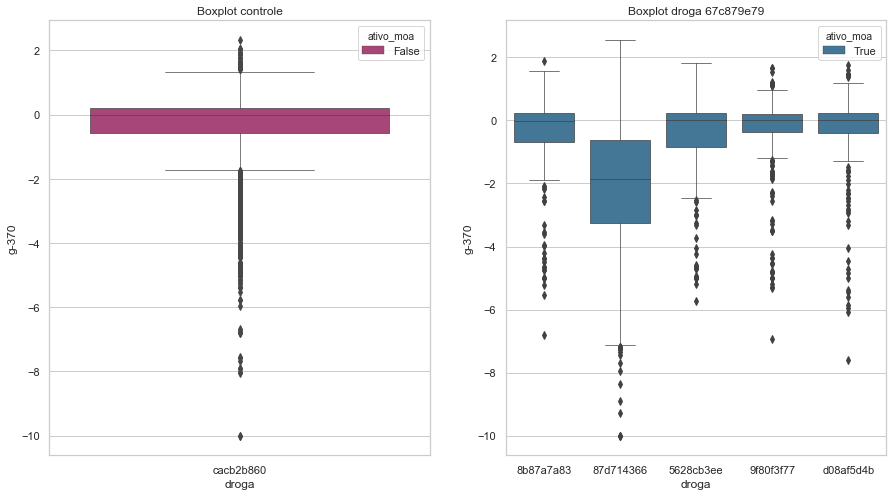

In [48]:
# Criando uma variável para receber o nome das top 5 drogas mais utilizadas, excluindo o controle
cod_drogas = df_merged['droga'].value_counts().index[1:6]

# Plotando alguns boxplots das top 5 drogas utilizadas para a lista de genes criada anteriormente e comparado com o grupo controle
for gene in g_list:
    fig, axs = plt.subplots(1,2,figsize=(15,8))
    sns.set_style("whitegrid")
    sns.boxplot(data = df_merged.query('droga == "cacb2b860"'), y= gene, x='droga', hue='ativo_moa', linewidth=0.7, palette='magma', ax=axs[0])
    axs[0].set_title('Boxplot controle')
    sns.boxplot(data = df_merged.query('droga in @cod_drogas'), y= gene, x='droga', hue='ativo_moa', linewidth=0.7, palette='mako', ax=axs[1])
    axs[1].set_title('Boxplot droga ' + droga )
    plt.show()

Todas as drogas selecionadas ativaram algum mecanismo de ação (lado direito). Com essa série de gráficos conseguimos ver como diferentes drogas modulam a expressão de diferentes genes.

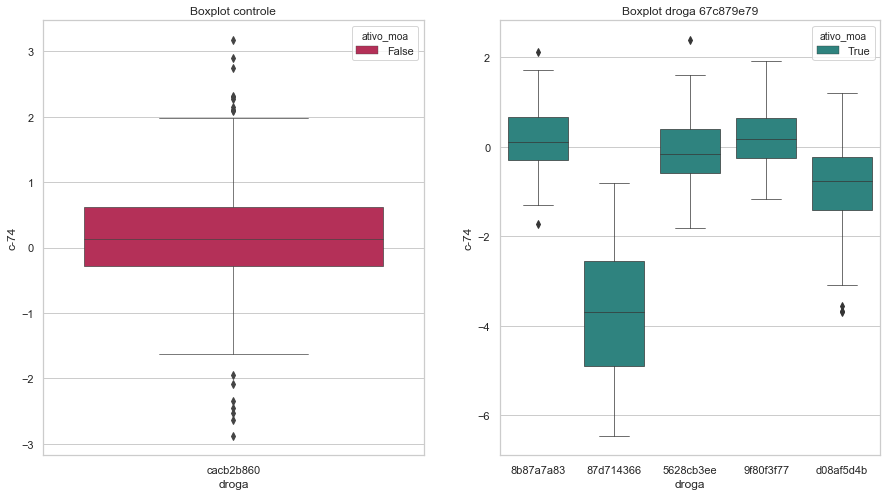

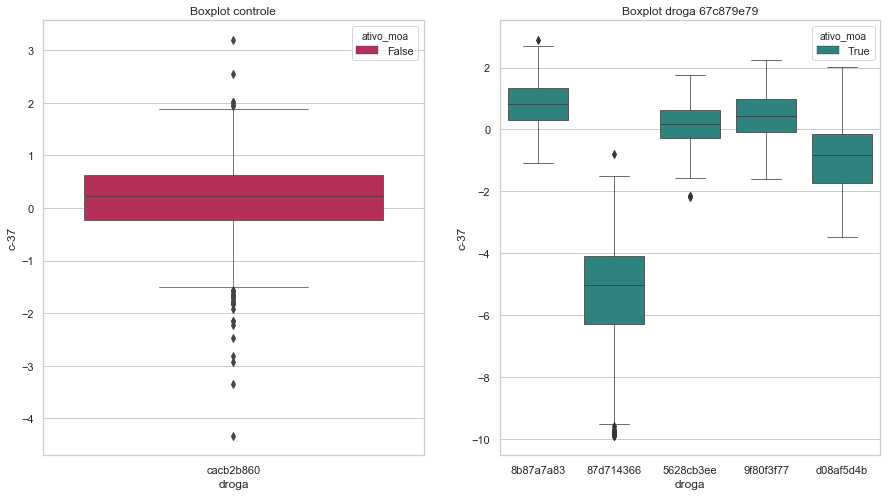

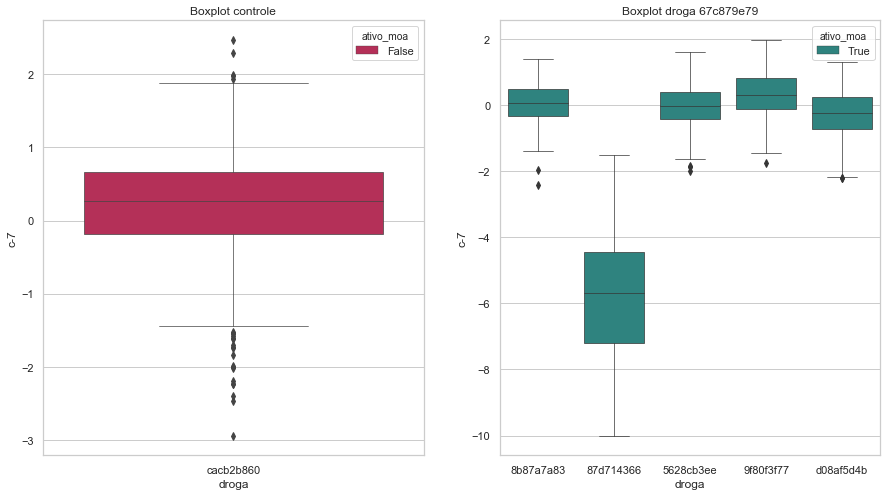

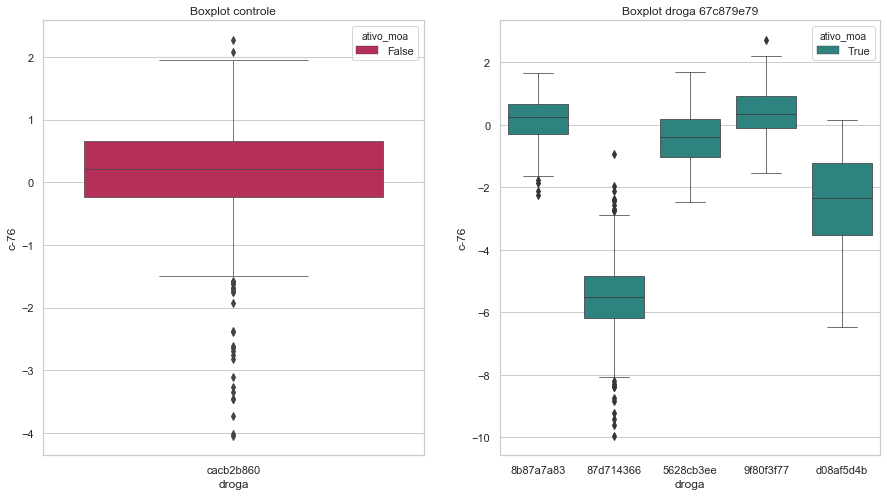

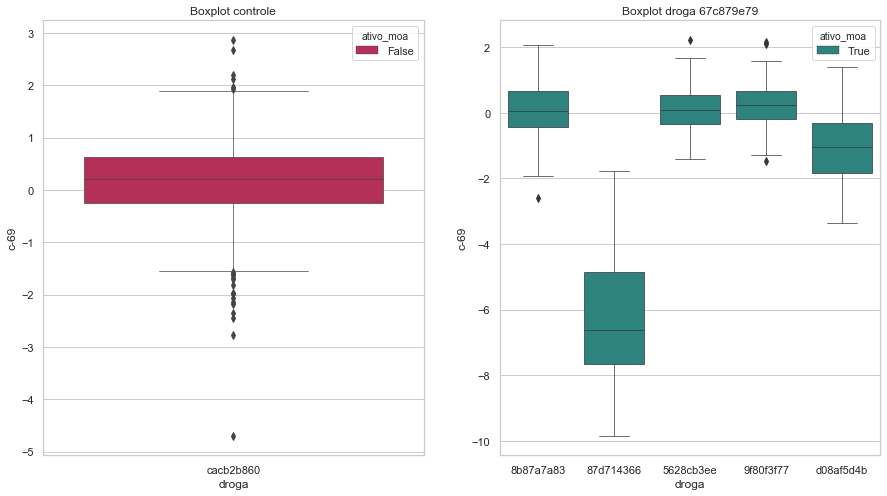

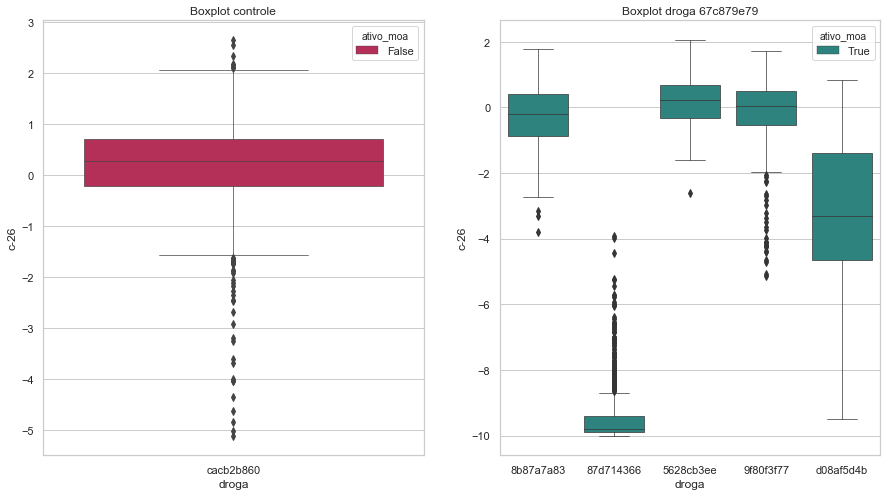

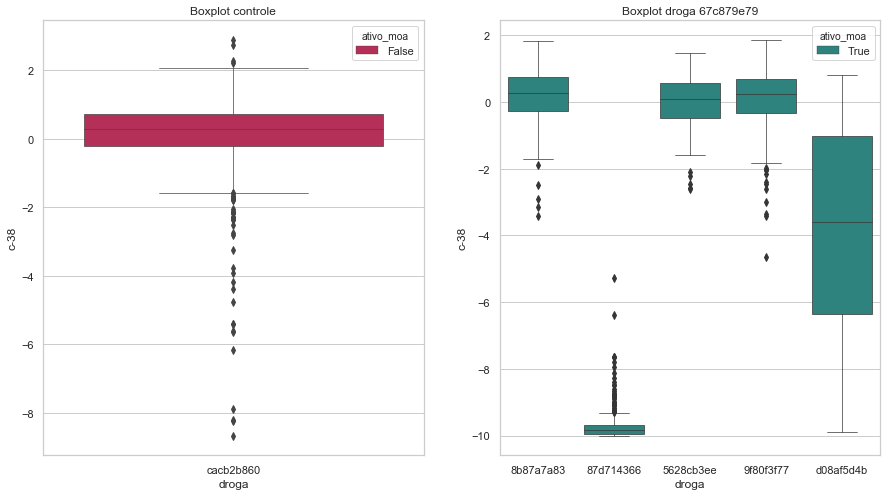

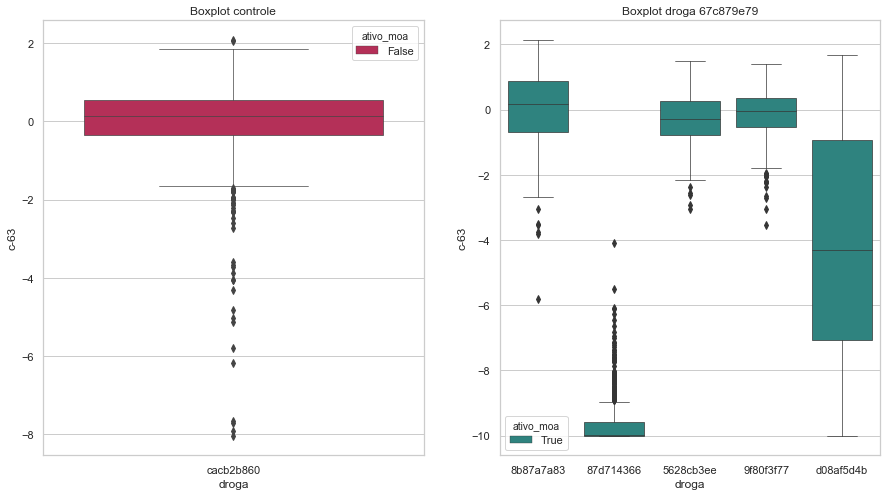

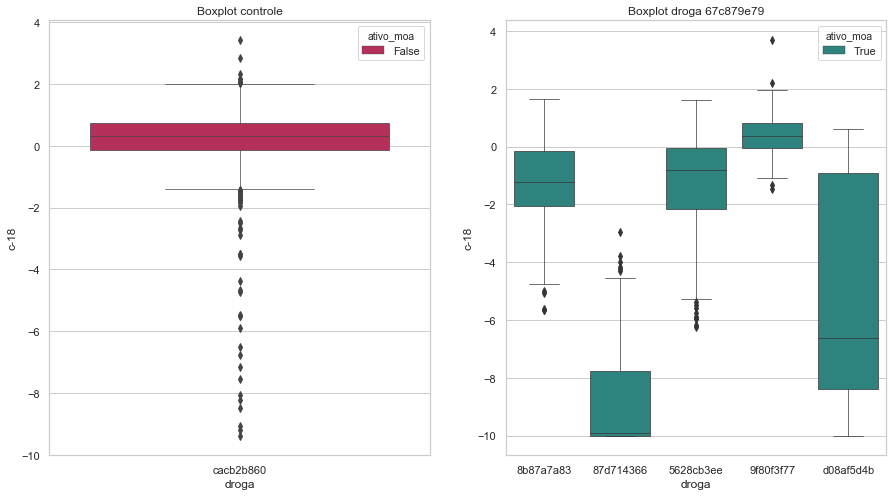

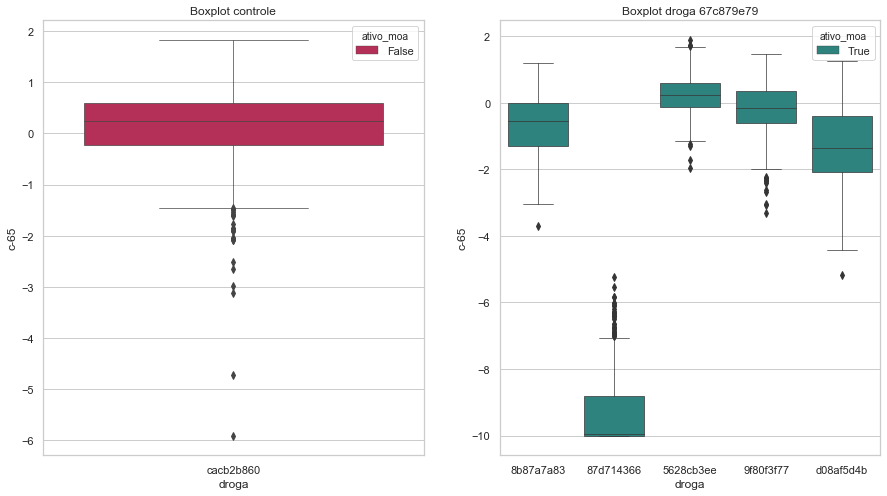

In [49]:
# Plotando alguns boxplots das top 5 drogas utilizadas para a lista de viabilidade celular criada anteriormente e comparado 
# com o grupo controle

for cells in c_list:
    fig, axs = plt.subplots(1,2,figsize=(15,8))
    sns.set_style("whitegrid")
    sns.boxplot(data = df_merged.query('droga == "cacb2b860"'), y= cells, x='droga', hue='ativo_moa', linewidth=0.7, palette='rocket_r', ax=axs[0])
    axs[0].set_title('Boxplot controle')
    sns.boxplot(data = df_merged.query('droga in @cod_drogas'), y= cells, x='droga', hue='ativo_moa', linewidth=0.7, palette='viridis', ax=axs[1])
    axs[1].set_title('Boxplot droga ' + droga )
    plt.show()

Todas as drogas selecionadas ativaram algum mecanismo de ação (lado direito). Com essa série de gráficos conseguimos ver como diferentes drogas alteram a viabilidade celular.

## 7. Modelagem preditiva - Criando um modelo de aprendizagem Não-Supervisionada

Neste projeto vamos utilizar o algoritmo KMeans para agrupar nosso conjunto de dados e compreender como eles estão organizados. Em um trabalho publicado na revista Nature por Patrik D'haeseleer (referência do artigo no Readme do repositório no GitHub), o pesquisador diz que método de agrupamento utilizando o KMeans é bem popular. Esse algoritmo de clusterização utiliza um método de particionamento, que subdivide todo o conjunto de dados, os genes no nosso caso, em um número predeterminado (k) de agrupamentos. 

O algoritmo é inicializado com k centróides do cluster escolhidos aleatoriamente, e cada gene é atribuído ao cluster com o centróide do armário. Em seguida, os centróides são redefinidos para a média dos genes em cada cluster. Este processo continua até que nenhum outro gene mude de cluster. Posições de centróide iniciais diferentes podem produzir resultados de cluster diferentes, e é importante executar o algoritmo várias vezes com sementes aleatórias diferentes.

### 7.1 Avaliando a Tendência de Cluster

Um teste estatístico que permite adivinhar se os dados seguem uma distribuição uniforme. Se o teste for positivo (uma pontuação de hopkins que tende a 0), significa que os dados não estão uniformemente distribuídos. Portanto, o agrupamento pode ser útil para classificar as observações. No entanto, se a pontuação for muito alta (acima de 0,5 por exemplo); os dados são distribuídos uniformemente e o clustering pode não ser realmente útil para o problema em questão.


| Estatística Hopkins para o conjunto de dados | Descrição                                      |
|:---------------------------------------------:|:------------------------------------------------|
|                                 Valores > 0.5 | significam que o dataset não é "clusterizável" |
|                                 Valores < 0.5 | significam que o dataset é "clusterizável"     |
|                                    Valor ≅ 0 | Quanto mais próximo de zero melhor.            |

In [50]:
# Vamos transformar a variável dose em numérica, substituindo D1 e D2 por 0 e 1, pois ela pode ser relevante para a clusterização
df_merged_clustering = df_merged.replace(["D1", "D2"], [0,1]); df_merged_clustering

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,0,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,0,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,0,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,0,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,1,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,1,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,1,True
23810,id_fffb70c0c,com_droga,24,1,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,1,True
23811,id_fffc1c3f4,com_controle,48,1,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,0,False
23812,id_fffcb9e7c,com_droga,24,0,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,1,True


In [51]:
# Selecionando apenas variáveis numéricas
df_numeric = df_merged_clustering.select_dtypes(exclude=['object'])

In [52]:
# Aplicando o teste hopkins
X = scale(df_numeric)
hopkins(X, 1000) # número de amostras

0.14876410049661265

Valor = **0.148** indica que o dataset é fortemente "clusterizável".


### 7.2 Redução de dimensionalidade

In [53]:
# Aplica redução de dimensionalidade
pca = PCA(n_components = 2).fit_transform(df_numeric)

Ao invés de trabalhar com mais de 800 variáveis vamos utilizar apenas 2 componentes principais. A matemática por trás do *Principal Component Analysis* utiliza auto valores e auto vetores para compressão dos dados, mudando o conjunto de dados de um espaço de características para outro. Com essa mudança nós conseguimos representar a mesma informação, os números podem mudar mas a informação continua a mesma. 

### 7.3 Determinando valor ideial de k (número ideial de clusters)

In [54]:
# Determinando um range de K
k_range = range(1,15)

In [55]:
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [56]:
# Ajustando o centróide do cluster para cada modelo criado anteriormente
centroids = [X.cluster_centers_ for X in k_means_var]

Agora vamos executar todos os passos matemáticos para calcular a distância euclidiana entre os pontos e depois plotar a curva de elbow.

Links úteis: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

In [57]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [58]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [59]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [60]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

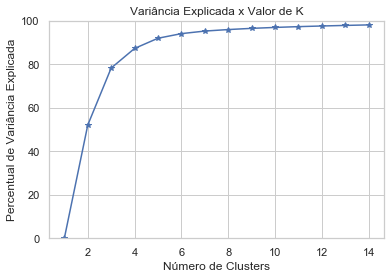

In [61]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

Olhando a curva de elbow podemos observar um platô a partir do valor de **k = 8**, a partir de 8 cluster conseguimos explicar a variância nos dados. O valor ideal de k que utilizeramos no Kmeans e algo acima desse valor. Portanto vamos clusterizar nosso dataset em **8 e 12 grupos** e depois comparar os resultados. Nem sempre um maior número de cluster pode melhorar a acurácia do modelo pois isso pode levar a sobreposição dos dados.

### 7.4 Criando o modelo utilizando o algoritmo KMeans

In [62]:
# Criando um modelo com K = 8
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
# obs: Esses subtrações e adições são necessárias para encontrar os valores ideais

xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

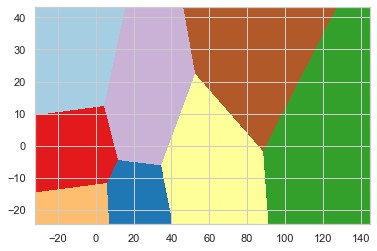

In [64]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

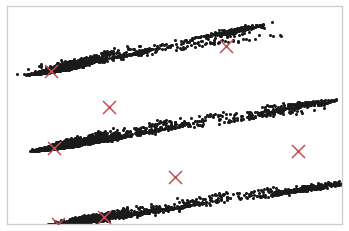

In [65]:
# Plot dos centróides
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Vamo utilizar uma métrica de clusterização que calcula o coeficiente de silhueta médio de todas as amostras. O melhor valor é 1 e o pior valor é -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra  foi atribuída ao cluster errado, pois um cluster diferente é mais semelhante.

In [66]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.7720260101891879

In [67]:
# Criando um modelo com K = 12
modelo_v2 = KMeans(n_clusters = 12)
modelo_v2.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

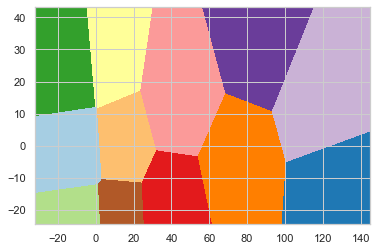

In [69]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

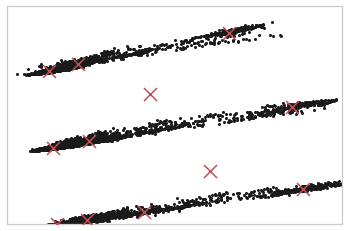

In [70]:
# Plot dos centróides
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = modelo_v2.cluster_centers_
inert = modelo_v2.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [71]:
# Silhouette Score
labels = modelo_v2.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.7217286306029895

A segunda versão do modelo apresentou um score inferior ao primeiro **0.72 vs 0.77**. O valor ideal de cluster neste caso é 8.

Concluindo este projeto, vamos criar um clustermap com a média do número de mecanismos de ação ativos por cluster.

In [72]:
# Lista com nomes das colunas
nomes_colunas = ['tratamento', 'tempo', 'dose', 'droga', 'n_moa', 'ativo_moa']

In [73]:
# Cria o cluster map
cluster_map = pd.DataFrame(df_merged, columns = nomes_colunas)
cluster_map['cluster'] = modelo_v1.labels_
display(cluster_map)

,tratamento,tempo,dose,droga,n_moa,ativo_moa,cluster
0,com_droga,24,D1,b68db1d53,1,True,0
1,com_droga,72,D1,df89a8e5a,0,False,4
2,com_droga,48,D1,18bb41b2c,3,True,3
3,com_droga,48,D1,8c7f86626,0,False,5
4,com_droga,72,D2,7cbed3131,1,True,4
...,...,...,...,...,...,...,...
23809,com_droga,24,D2,df1d0a5a1,1,True,0
23810,com_droga,24,D2,ecf3b6b74,1,True,0
23811,com_controle,48,D2,cacb2b860,0,False,3
23812,com_droga,24,D1,8b87a7a83,1,True,0


In [74]:
# Calcula a média de consumo de energia por cluster
n_moa_mean = cluster_map.groupby('cluster')['n_moa'].mean().sort_values(ascending=False); display(n_moa_mean)

cluster
2    1.786885
7    1.674033
1    0.806026
5    0.784571
0    0.660885
3    0.655055
4    0.651706
6    0.645833
Name: n_moa, dtype: float64

O cluster 2 apresentou a maior média (**1,78**) de mecanismos de ação ativos.

# 8. Conclusões

- Não há valores duplicados.

- Não há valores ausentes.

- A droga **‘cacb2b860’** aparece com mais frequência do que as outras e representa que a amostra não recebeu tratamento nenhum.

- Apenas **9 drogas** aparecem com muito mais frequência do que as demais dentro da base de dados.

- Os dados nas variáveis **‘dose’** e **‘tempo’** estão bem distribuídos entre os grupos.
- O desenho experimental foi feito para utilizar duas doses em três janelas distintas de tempo **(24h, 48 e 72h)** para verificar a modulação da expressão gênica em mais de **700 genes** e na **viabilidade celular** por diferentes drogas com **diferentes mecanismos de ação**.

- O gene **'g-707’** é o que apresenta a maior média de expressão, seguidos dos genes **'g-100'**, **'g-744'** e **'g-392'**. Enquanto os genes **'g-370'**, **'g-508'** e **'g-37'** apresentaram a menor média de expressão.

- A distribuição dos dados para a média das expressões gênicas se assemelha muito a uma curva normal, tendo **assimetria levemente negativa** e **kurtosis levemente positiva**.

- As variáveis que representam a viabilidade celular que apresentaram a maior média foram as **'c-74'**, **'c-37'**, **'c-7'**, **'c-76'** e **'c-69'**. Enquanto as menores médias foram as variáveis **'c-65'**, **'c-18'**, **'c-63'**, **'c-38'** e **'c-26'** respectivamente. É interessante observar que todas as médias foram **negativas**, o que pode indicar baixa viabilidade celular para todas as variáveis do conjunto de dados.

- A distribuição dos dados para a média de viabilidade celular **não** se assemelha a uma curva normal, tendo **assimetria positiva** e **kurtosis fortemente positiva**. Os dados estão muito mais concentrados em torno da média da distribuição (-0,432231) com um desvio padrão baixo (0,093).

- Podemos inferir que alguns genes se correlacionam tanto **positivamente** como **negativamente** com a **viabilidade celular**. Em outras palavras, existem situações em que a expressão gênica aumenta e a viabilidade celular também **(correlação positiva)** e casos em que a expressão gênica diminui/aumenta e a viabilidade celular aumenta/diminui respectivamente **(correlação negativa)**.

- Analisando as features selecionadas para fins didáticos, podemos afirmar que os genes **'g-38'** e **'g-672'** estão correlacionados **negativamente**, o que significa que quando a expressão gênica de um **aumenta** a do outro **diminui**. Quando a expressão do **'g-38'** aumenta a viabilidade **(c-26)** tende a **diminuir**. Quando a expressão de **'g-672'** aumenta a viabilidade celular também tende a **aumentar**. Esses resultados podem indicar que esses genes possam estar intrinsicamente conectados por alguma via que foi modulada pela droga em questão. O **tempo de exposição** é **relevante** para os efeitos observados superexpressão gênica de g-38 e subexpressão do g-672 foram mais intensas no **tempo de 72h**.

- Podemos inferir que dentre as drogas analisadas **há uma diferença na expressão gênica** de **'g-38'** quando comparados os grupos tratado e controle. Testes estatísticos específicos poderiam confirmar essa hipótese, que por sinal é bem forte.

- Existem mais de **200 mecanismos de ação** no segundo conjunto de dados.

- Os tipos de mecanismo de ação mais frequentes foram **‘nfkb_inhibitor’**,**‘proteasome-inhibitor’**, **‘cyclooxygenase_inhibitor’**,**‘dopamine_receptor_antagonist’**, e **‘serotonin_receptor_antagonist’**.

- **Nenhum** mecanismo de ação foi **ativado** no grupo controle, o que é esperado e ideal.

- O conjunto de dados é altamente **“clusterizável”** obtendo um resultado de **0,14** no teste de Hopkins.

- O número ideal de cluster para se trabalhar com essa base de dados foi de **8 grupos**, com um score de silhueta de **0,77**.

- O grupo que apresentou a **maior média de mecanismos de ação** ativos foi o **grupo 2**.

- Curiosidade: Este notebook levou 05:09,87ms para ser executado.


Apesar de conseguido fazer algumas análises interessantes, o curto prazo para a execução deste projeto teve forte influência dentro do que foi possível ser feito. Concentrei meus esforços no que foi mais relevante dentro do conjunto de dados, como as drogas mais utilizadas, os genes que tiveram a média de expressão mais alterada e as variáveis de viabilidade celular que mais divergiram em relação ao grupo controle. Todas as análises foram feitas utilizando apenas essas 20 variáveis selecionadas de acordo com esse critério. O ideal seria trabalhar com todos os genes, o que levaria muito mais tempo, entretanto, creio que o resultado ficou excepcional dentro do prazo de 3 dias proposto para executar este projeto.

Se você chegou até aqui, meus sinceros agradecimentos, sei que o notebook ficou imenso e é preciso muita resiliência para ver com calma os resultados e chegar em alguma conclusão. Esse desafio foi uma oportunidade incrível de testar meus conhecimentos e de trabalhar dentro de uma área incrível que é a biologia. Por fim, gostaria de parabenizar todos os membros da equipe da Alura pelo excelente treinamento e suporte durante toda a 3 Imersão dados.


#### Versionamento

| Versão | Editor            | Data       | Observação                  |
|:-------|:-------------------|:------------|:-----------------------------|
|    1.0 | Eduardo Gonçalves | 09/05/2021 | Primeira versão do projeto. |
|        |                   |            |                             |